# 0_read

In [26]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 35)  ## 생략 없이 한 번에 띄울 피쳐수 = 35
from my_func import *

import matplotlib.pyplot as plt
import seaborn as sns
plt.rc("font",family="Malgun Gothic")  ## 폰트       한글 깨짐
plt.rc("axes",unicode_minus=False)     ## 폰트 minus 부호 깨짐
plt.style.use("ggplot")

df1 = pd.read_parquet( "data\df1.parquet" )
df3 = pd.read_parquet( "data\df3.parquet" )

print(f"{df1.shape[0]:,}     {df3.shape[0]:,}")
display(df1.head(1))
display(df3.head(1))

5,623,810     544,921


,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000,0.0,18.6,18.6,2019-08-01,2019,8,1,3,1


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815,2019-08-25,2019,8,25,24330,18960,0,5370,5370,0.0,22.1,22.1,1,2,0,1,0,0,0,1,0,0,0,0


# 1_날짜별 구매량

In [20]:
df = df1[['pre', 'buy_d', 'cnt_b']].groupby("buy_d").sum()
df = df.reset_index()

display(df.head(2))
display(df.tail(2))

,buy_d,pre,cnt_b
0,1,4370431582,247873
1,2,3570729041,192906


,buy_d,pre,cnt_b
29,30,3090651311,170953
30,31,1833280305,102116


In [4]:
from my_func import *
infox(df)

◆◆◆ (31, 3): Total shape ◆◆◆
---(31, 3): Numeric Data: only Real Number ↓↓↓ ---------------------------
NO  Column  null  null(%)  dtype  n_uniq  |           Mean          Std      |max-min|  │            min             Q1         median             Q3            max  
 0   buy_d     0      0.0  int64      31  |             16        8.944             30  │              1            8.5             16           23.5             31  
 1     pre     0      0.0  int64      31  |  3,710,867,454  870,988,565  4,554,094,885  │  1,833,280,305  3,264,797,218  3,453,199,653  3,823,875,307  6,387,375,190  
 2   cnt_b     0      0.0  int64      31  |        181,413       20,981        145,757  │        102,116        173,421        182,480        186,848        247,873  
------------------------------------------------------------------------------ 



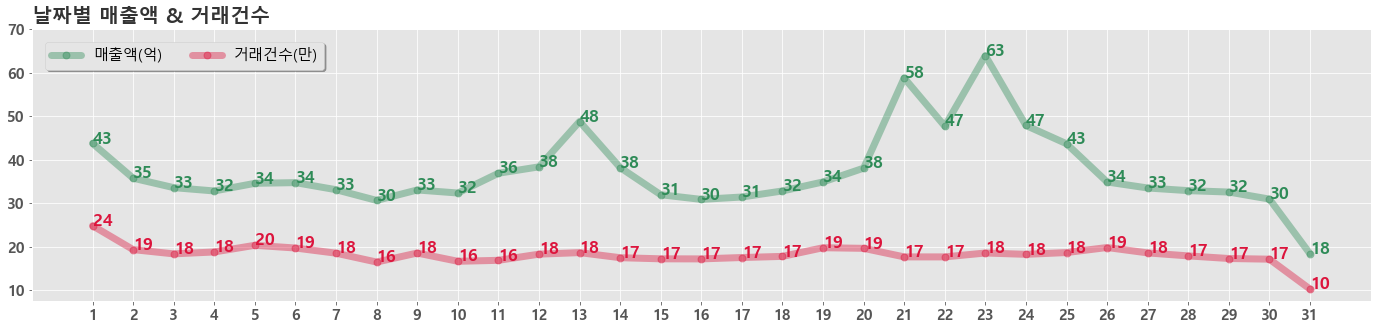

In [21]:
x, y1, y2 = df.buy_d, df.pre, 10000*df.cnt_b
y1p, y2p = [i//(10**8) for i in y1], [i//(10**8) for i in y2]

plt.figure(figsize=((24,5)))
plt.plot( x, y1, label="매출액(억)",   alpha=0.4, lw=7, ls="-", color ="seagreen", marker='o', ms=7, mfc="seagreen", solid_capstyle='round' )
plt.plot( x, y2, label="거래건수(만)", alpha=0.4, lw=7, ls="-", color ="crimson",  marker='o', ms=7, mfc="crimson",  solid_capstyle='round' )

plt.xticks(x, size=15, weight=1000, )
plt.yticks(range(10**9,8*10**9,10**9),range(10,80,10), size=15, weight=1000, )

for i in range(31):
    plt.text( x[i], y1[i], y1p[i], size=17, color="seagreen", weight=1000, )
    plt.text( x[i], y2[i], y2p[i], size=17, color="crimson", weight=1000, )

plt.title("날짜별 매출액 & 거래건수", weight=1000, color="k", size=20, alpha=0.8, loc="left", )
plt.legend(loc=(0.01,0.85), ncol=2, fontsize=15, frameon=True, shadow=True)

plt.show()

In [6]:
df1.head(1)

,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000,0.0,18.6,18.6,2019-08-01,2019,8,1,3,1


In [22]:
### 90만원대 결제건 data만 추출
df_1 = df1.loc[ (df1.pre>=900000) & (df1.pre<1000000), ["buy_d","pre","cnt_b"] ]

### 날짜별 그룹바이
df_1 = df_1.groupby(["buy_d"]).sum()
df_1 = df_1.reset_index()
df_1

,buy_d,pre,cnt_b
0,1,13517842,14
1,2,7723200,8
2,3,1987950,2
3,4,10567020,11
4,5,4800940,5
5,6,56409300,60
6,7,65971852,70
7,8,50696600,54
8,9,79778580,85
9,10,91007160,95


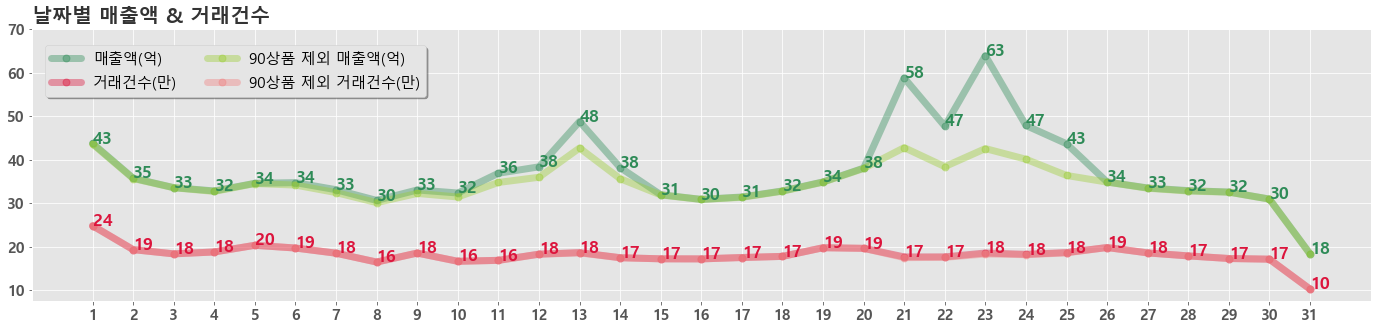

In [23]:
x, y1, y2 = df.buy_d, df.pre, 10000*df.cnt_b
y1p, y2p = [i//(10**8) for i in y1], [i//(10**8) for i in y2]

plt.figure(figsize=((24,5)))
plt.plot( x, y1, label="매출액(억)",   alpha=0.4, lw=7, ls="-", color ="seagreen", marker='o', ms=7, mfc="seagreen", solid_capstyle='round' )
plt.plot( x, y2, label="거래건수(만)", alpha=0.4, lw=7, ls="-", color ="crimson",  marker='o', ms=7, mfc="crimson",  solid_capstyle='round' )
for i in range(31):
    plt.text( x[i], y1[i], y1p[i], size=17, color="seagreen", weight=1000, )
    plt.text( x[i], y2[i], y2p[i], size=17, color="crimson", weight=1000, )

### 보따리 상품 제외 자료
z1, z2 = df_1.pre, 10000*df_1.cnt_b
plt.plot( x, y1-z1, label="90상품 제외 매출액(억)",   alpha=0.4, lw=7, ls="-", color ="yellowgreen", marker='o', ms=7, mfc="yellowgreen", solid_capstyle='round' )
plt.plot( x, y2-z2, label="90상품 제외 거래건수(만)", alpha=0.4, lw=7, ls="-", color ="lightcoral",  marker='o', ms=7, mfc="lightcoral",  solid_capstyle='round' )

plt.xticks(x, size=15, weight=1000, )
plt.yticks(range(10**9,8*10**9,10**9),range(10,80,10), size=15, weight=1000, )
plt.title("날짜별 매출액 & 거래건수", weight=1000, color="k", size=20, alpha=0.8, loc="left", )
plt.legend(loc=(0.01,0.75), ncol=2, fontsize=15, frameon=True, shadow=True)
plt.show()

In [29]:
### 90만원대 결제건 data만 추출
df_1 = df1.loc[ df1.pre.apply(lambda x:x in case), ["buy_d","pre","cnt_b"] ]

### 날짜별 그룹바이
df_1 = df_1.groupby(["buy_d"]).sum()
df_1 = df_1.reset_index()

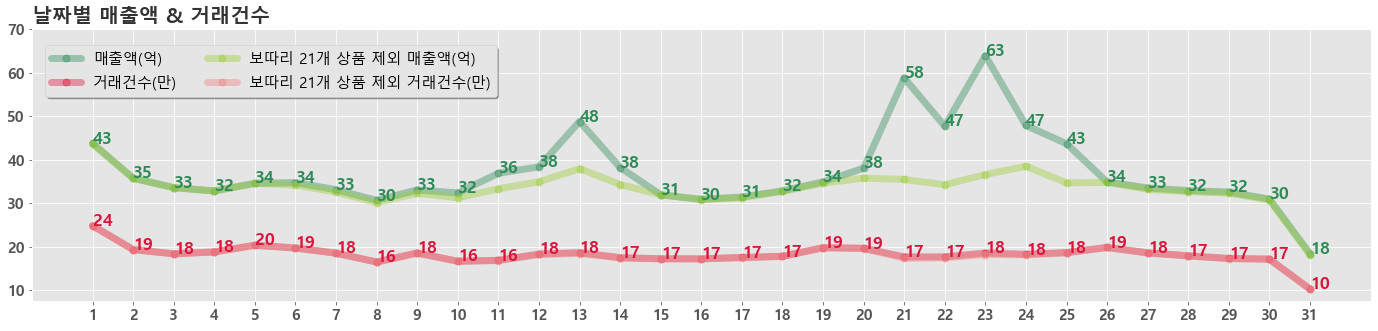

In [30]:
x, y1, y2 = df.buy_d, df.pre, 10000*df.cnt_b
y1p, y2p = [i//(10**8) for i in y1], [i//(10**8) for i in y2]

plt.figure(figsize=((24,5)))
plt.plot( x, y1, label="매출액(억)",   alpha=0.4, lw=7, ls="-", color ="seagreen", marker='o', ms=7, mfc="seagreen", solid_capstyle='round' )
plt.plot( x, y2, label="거래건수(만)", alpha=0.4, lw=7, ls="-", color ="crimson",  marker='o', ms=7, mfc="crimson",  solid_capstyle='round' )
for i in range(31):
    plt.text( x[i], y1[i], y1p[i], size=17, color="seagreen", weight=1000, )
    plt.text( x[i], y2[i], y2p[i], size=17, color="crimson", weight=1000, )

### 보따리 상품 제외 자료
z1, z2 = df_1.pre, 10000*df_1.cnt_b
plt.plot( x, y1-z1, label="보따리 21개 상품 제외 매출액(억)",   alpha=0.4, lw=7, ls="-", color ="yellowgreen", marker='o', ms=7, mfc="yellowgreen", solid_capstyle='round' )
plt.plot( x, y2-z2, label="보따리 21개 상품 제외 거래건수(만)", alpha=0.4, lw=7, ls="-", color ="lightcoral",  marker='o', ms=7, mfc="lightcoral",  solid_capstyle='round' )

plt.xticks(x, size=15, weight=1000, )
plt.yticks(range(10**9,8*10**9,10**9),range(10,80,10), size=15, weight=1000, )
plt.title("날짜별 매출액 & 거래건수", weight=1000, color="k", size=20, alpha=0.8, loc="left", )
plt.legend(loc=(0.01,0.75), ncol=2, fontsize=15, frameon=True, shadow=True)
plt.show()

# 2_90만원대 구매건 조회

In [101]:
display(df1.head(1))
display(df3.head(1))

,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000,0.0,18.6,18.6,2019-08-01,2019,8,1,3,1


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815,2019-08-25,2019,8,25,24330,18960,0,5370,5370,0.0,22.1,22.1,1,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [2]:
### 90만원대 결제건 data만 추출
df = df1.loc[ (df1.pre>=900000) & (df1.pre<1000000), ["id","pre","buy_cut","cnt_b"] ]
print(df.shape)
df.head(3)

(8445, 4)


,id,pre,buy_cut,cnt_b
32626,181440,985000,2019-08-01,1
62223,16481,946100,2019-08-02,1
62696,66121,976250,2019-08-02,1


In [3]:
### 1) 금액별 많이 팔린 순
df_1 = df.groupby(["pre"]).sum()
df_1 = df_1.sort_values(by="cnt_b", ascending=False)
print(df_1.shape)
display(df_1.head(10))

(135, 2)


,id,cnt_b
pre,,
935000,1770678887,6441
958800,334598230,1263
938400,57354263,241
948600,52752437,166
925000,33037608,124
930600,3820366,15
988000,2195786,10
999000,2011953,7
980000,1892800,7


In [167]:
### 2) 날짜별 많이 팔린 순
df_1 = df.groupby(["buy_cut"]).sum()
df_1 = df_1.sort_values(by="cnt_b", ascending=False)
print(df_1.shape)
display(df_1.head(3))

(123, 3)


,id,pre,cnt_b
buy_cut,,,
2019-10-21,468460983,1599811800,1711
2019-12-23,456385019,1526037000,1632
2019-10-22,266881668,926600860,991


<function matplotlib.pyplot.show(close=None, block=None)>

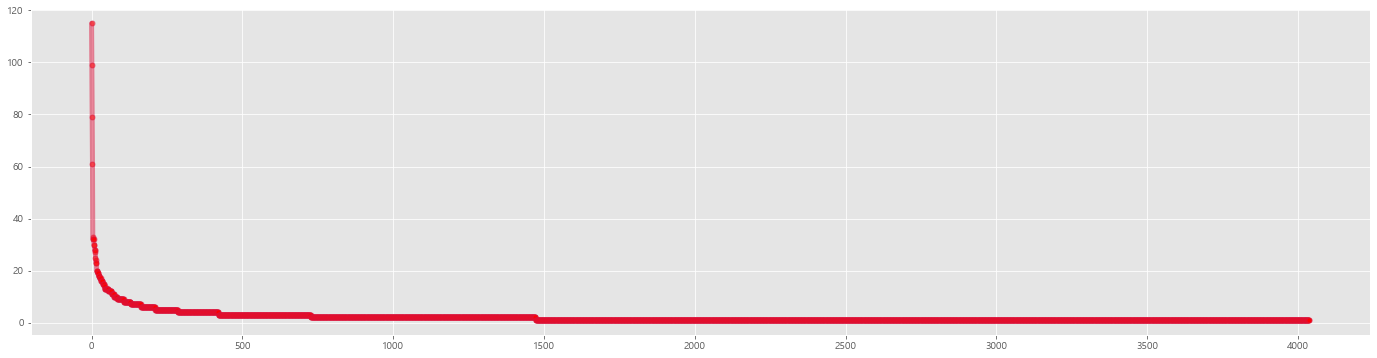

In [163]:
### 90만원대 거래 5번 이상인 유저로 컷하자

plt.figure(figsize=((24,6)))
x, y = range(4038), df_3.cnt_b
plt.plot(x,y, label="크림슨_빨간줄", alpha=0.5, lw=5, ls="-", color ="Crimson", marker='o', ms=5, mfc="RED", solid_capstyle='round' )
plt.show

In [164]:
df_3.cnt_b.value_counts()

1      2565
2       746
3       306
4       135
5        75
6        47
7        34
8        23
9        22
13       12
12       11
10       10
11        8
16        6
15        5
17        4
18        4
32        3
20        3
19        3
23        2
28        2
30        2
14        2
24        1
25        1
27        1
33        1
61        1
79        1
99        1
115       1
Name: cnt_b, dtype: int64

In [162]:
### 3) 유저별 많이 팔린 순

""" 1. 동일유저 """
df_3 = df.groupby(["id"]).sum()
df_3 = df_3.sort_values(by="cnt_b", ascending=False)
print(df_3.shape)
display(df_3.head(2))

""" 2. 동일유저, 동일날짜 """
df_2 = df.groupby(["id","buy_cut"]).sum()
df_2 = df_2.sort_values(by="cnt_b", ascending=False)
print(df_2.shape)
display(df_2.head(2))

""" 2. 동일유저, 동일날짜, 동일금액 """
df_1 = df.groupby(["id","buy_cut","pre"]).sum()
df_1 = df_1.sort_values(by="cnt_b", ascending=False)
print(df_1.shape)
display(df_1.head(2))

(4038, 2)


,pre,cnt_b
id,,
377381,108660600,115
94844,94023600,99


(6352, 2)


,,pre,cnt_b
id,buy_cut,,
377381,2020-01-13,20981400,22
537771,2020-01-13,15259200,16


(6413, 1)


,,,cnt_b
id,buy_cut,pre,
460470,2019-12-23,935000,14
38481,2020-01-09,938400,13


In [123]:
### case: 90만원대 거래 한 번이라도 한 적 있는 유저 리스트

member = df1.loc[ df1.pre.apply(lambda x:True if 900000<=x<1000000 else False), "id" ]
member = set(member)
print(len(member))

4038


In [126]:
### 1) 해당 멤버의 거래만 추출한다.
df = df1.loc[ df1.id.apply(lambda x:x in member), ["id","buy_cut","pre","cnt_b"] ]
print(df.shape)
df.head(3)

(67009, 4)


,id,buy_cut,pre,cnt_b
17,373165,2019-08-01,5000,1
63,457308,2019-08-01,10900,1
71,246422,2019-08-01,15500,1


In [128]:
## 2) 동일유저, 같은날, 같은금액 결제건들 ---> 압축한다.
df = df.groupby(["id","buy_cut","pre"]).sum()
df = df.reset_index()
print(df.shape)
df.head(3)

(50818, 4)


,id,buy_cut,pre,cnt_b
0,78,2019-12-23,935000,1
1,439,2019-10-21,7400,1
2,439,2019-10-21,935000,1


In [129]:
""" 하루만에 같은금액 결제를 63번이나 한 사람도 있다! """
df.sort_values(by="cnt_b", ascending=False).head()

,id,buy_cut,pre,cnt_b
19796,226414,2020-01-13,28200,63
5320,49508,2019-12-23,93500,30
32328,356379,2019-12-23,93500,25
27238,304670,2019-12-23,93500,20
13979,159034,2019-10-21,93500,20


In [138]:
### 해당 member: 매출액 높은 순으로 상위 유저 선발

mem = df3.loc[ df3.id.apply(lambda x:x in member), ["id","pre"] ]
mem = mem.sort_values(by="pre",ascending=False)
print(mem.shape)
display(mem.head(5))

member = list(mem.id)
print(len(member))
member[:5]

(4038, 2)


,id,pre
377380,377381,115005350
94843,94844,110444100
38480,38481,76952000
335735,335736,66233030
52709,52710,39306136


4038


[377381, 94844, 38481, 335736, 52710]

In [139]:
df.head(3)

,id,buy_cut,pre,cnt_b
0,78,2019-12-23,935000,1
1,439,2019-10-21,7400,1
2,439,2019-10-21,935000,1


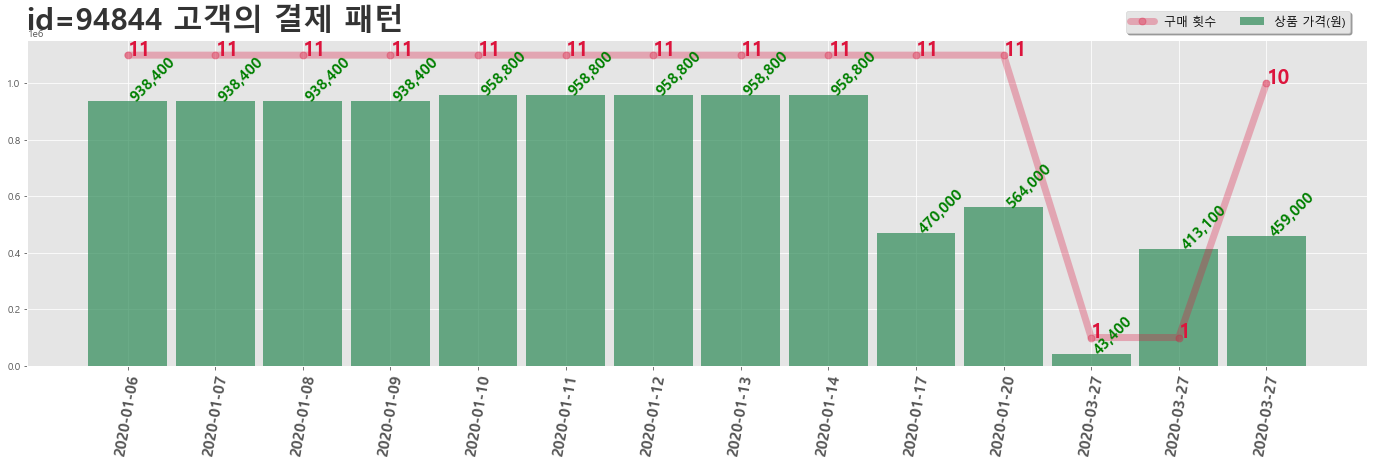

In [149]:
### 유저별 데이터 추출
id = 94844 
df_graph = df.loc[ df.id==id ].reset_index(drop=True)
N = len(df_graph)

x = range(N)
y = df_graph.pre
c = df_graph.cnt_b.apply(lambda x:x*100000)
x_name = df_graph.buy_cut.astype(str)
y_name = df_graph.pre.apply(lambda x:f"{x:,}")
c_name = df_graph.cnt_b

plt.figure(figsize=((24,6)))
plt.bar(x, y, color="SeaGreen", alpha=0.7, width=0.9, label="상품 가격(원)", )
plt.plot(x, c, color="Crimson", label="구매 횟수", alpha=0.3, ls="-", linewidth=7, marker='o', ms=7, mfc="Crimson", solid_capstyle='round', )

for i in range(N):
    plt.text(x[i],y[i],y_name[i], size=15, color="Green", weight=1000, rotation=45)
    plt.text(x[i],c[i],c_name[i], size=20, color="Crimson", weight=1000,  )
    
plt.title(f"id={id} 고객의 결제 패턴", weight=1000, color="k", size=30, alpha=0.8, pad=10, loc="left", )
plt.xticks(x, x_name, fontsize=15, rotation=80, weight=1000, )
plt.legend(loc=(0.82,1.02), fontsize=12, ncol=2, frameon=True, shadow=True, )
plt.show()

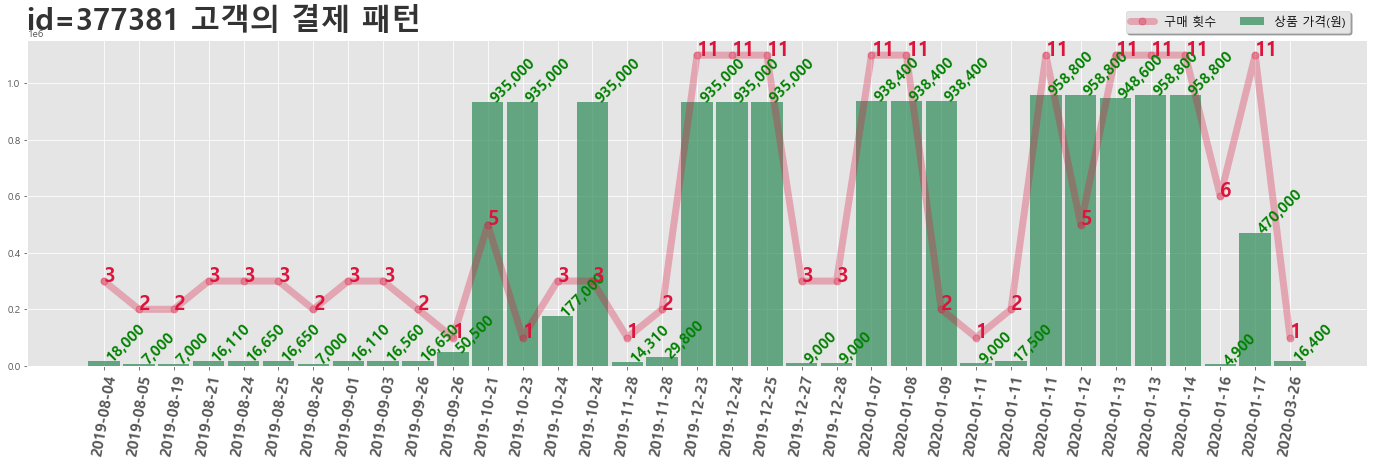

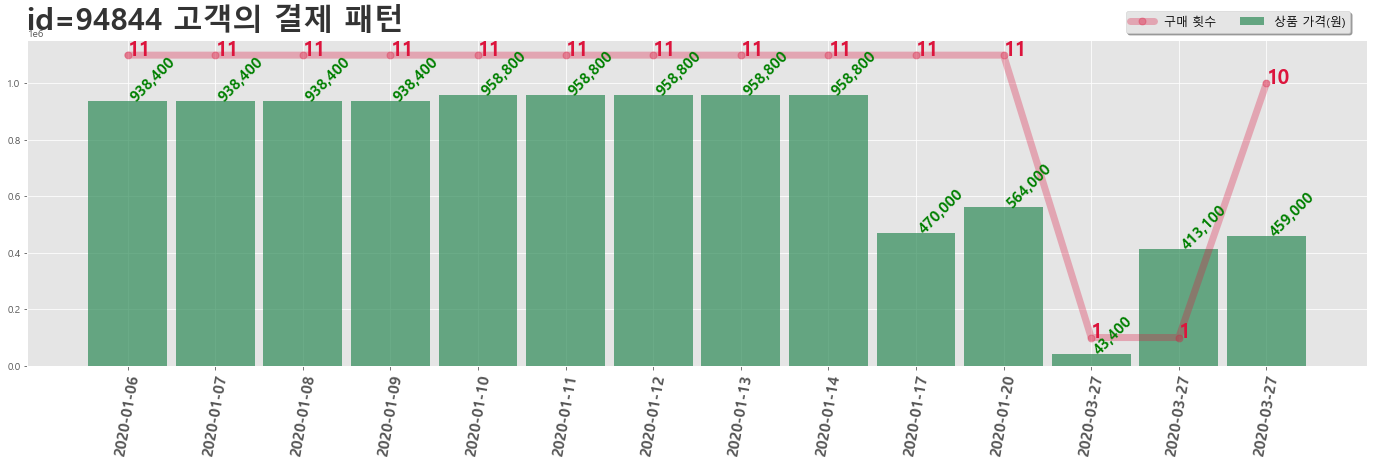

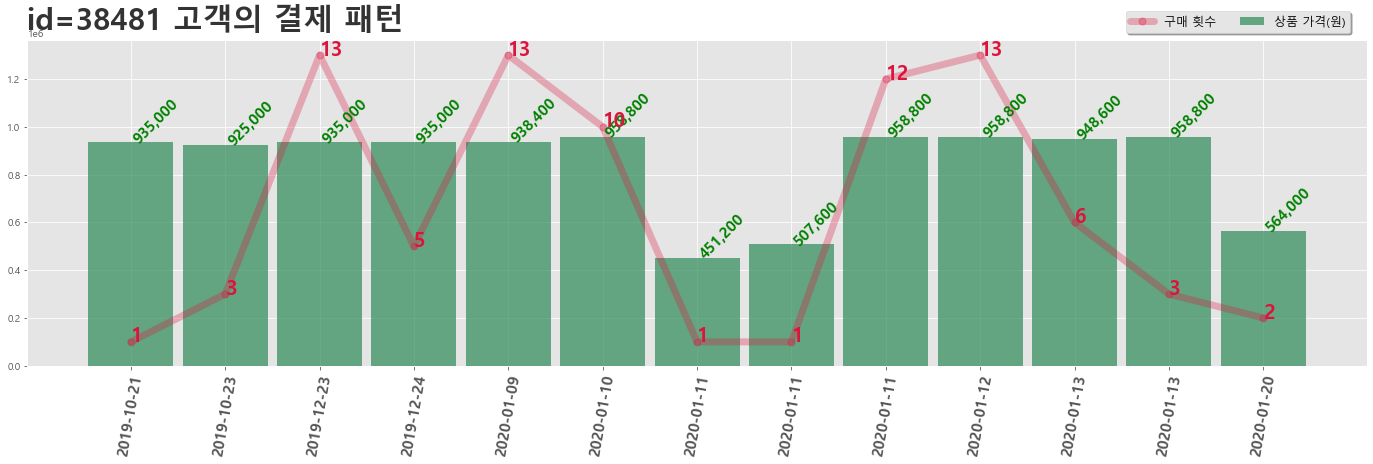

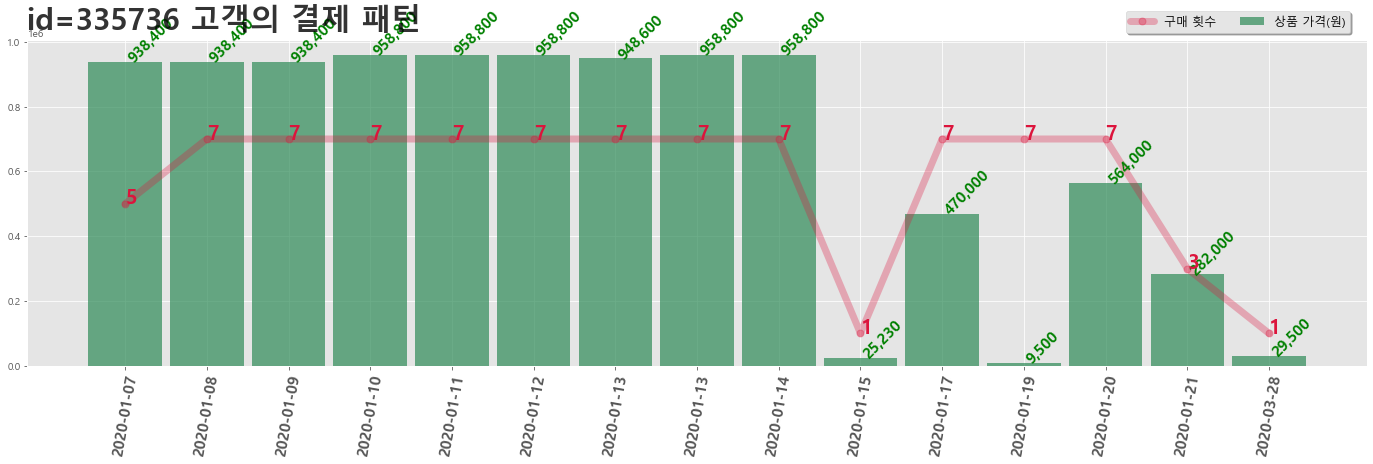

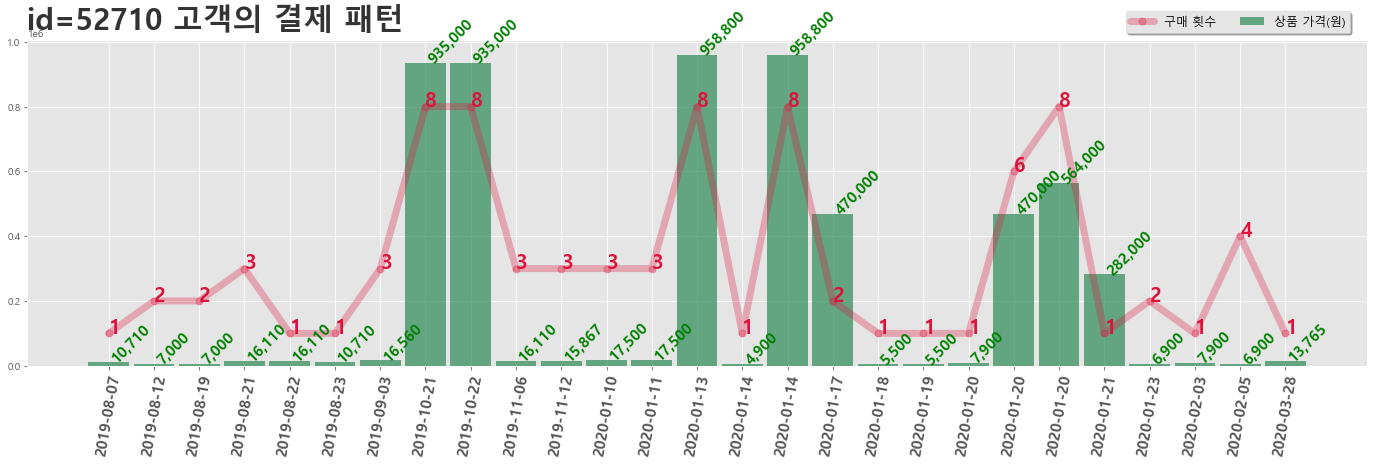

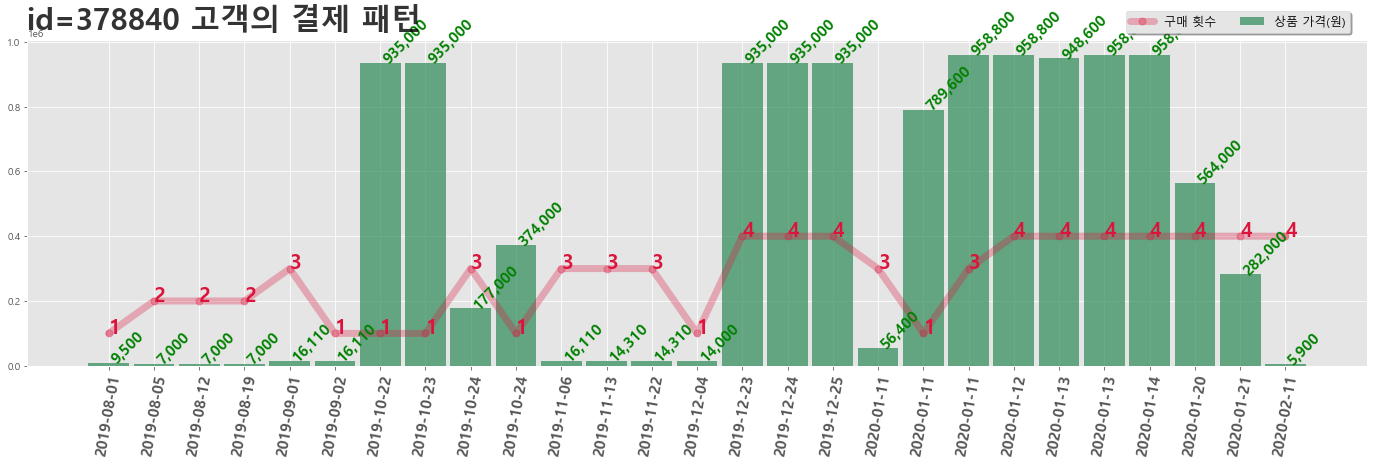

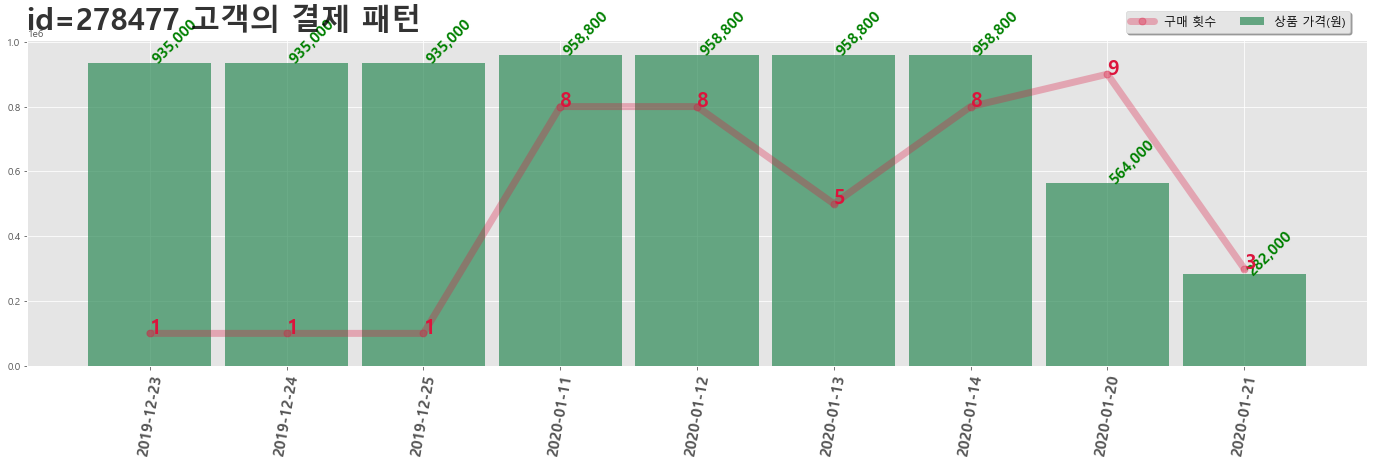

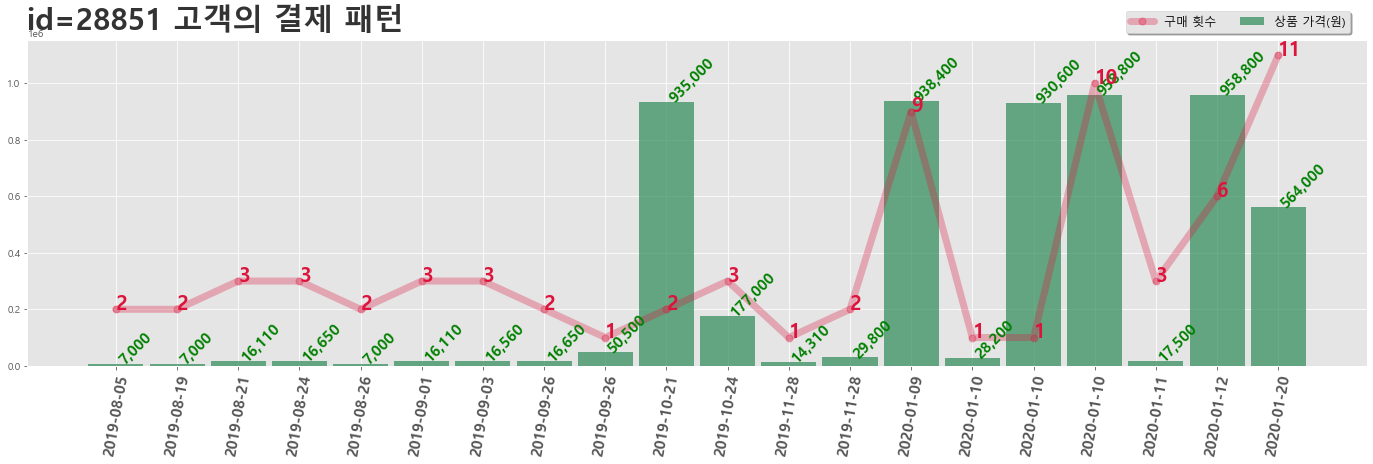

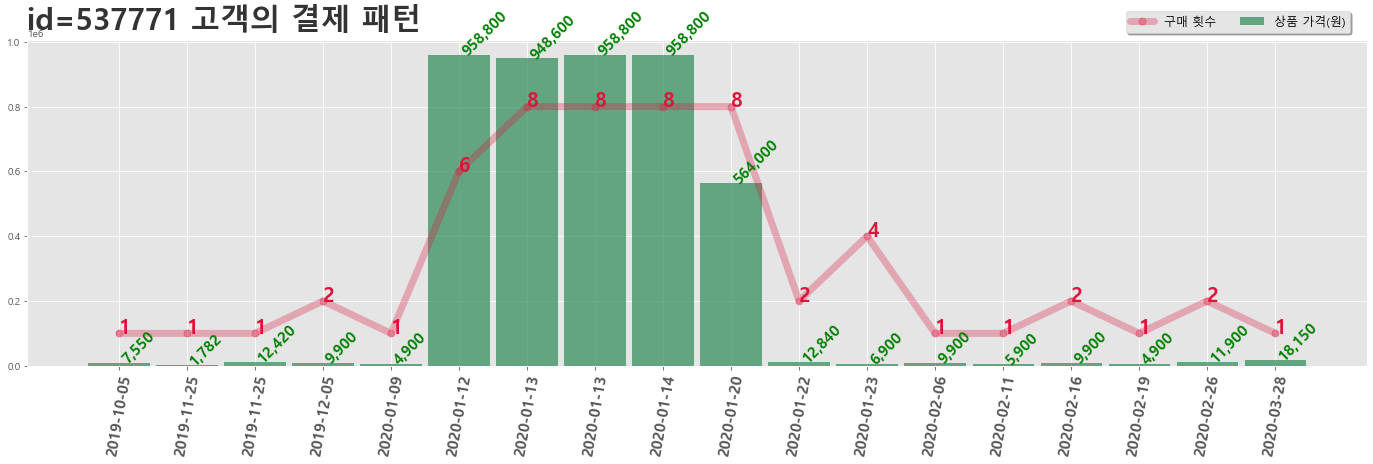

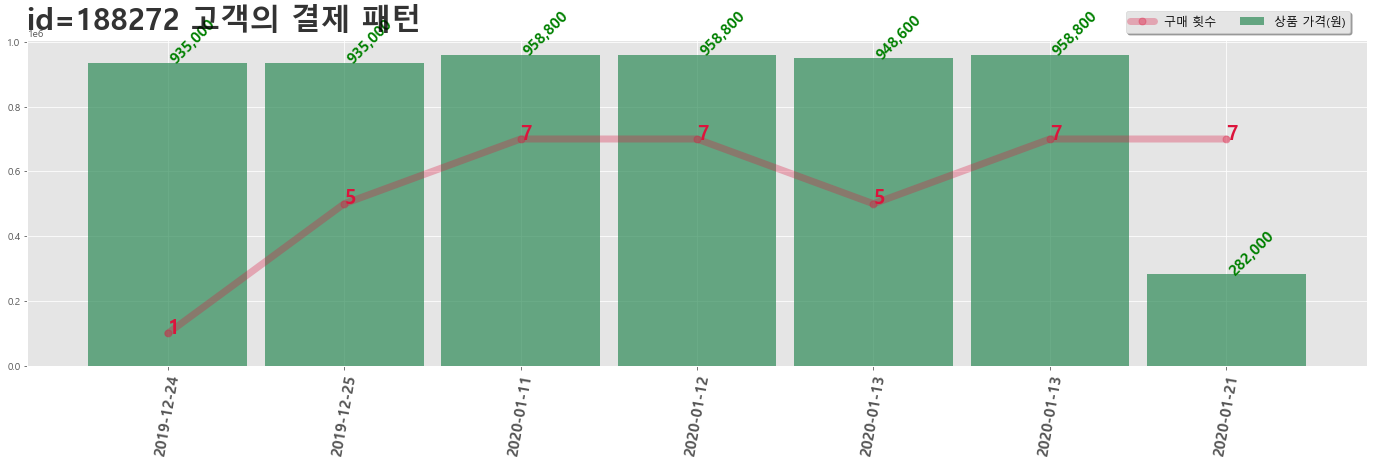

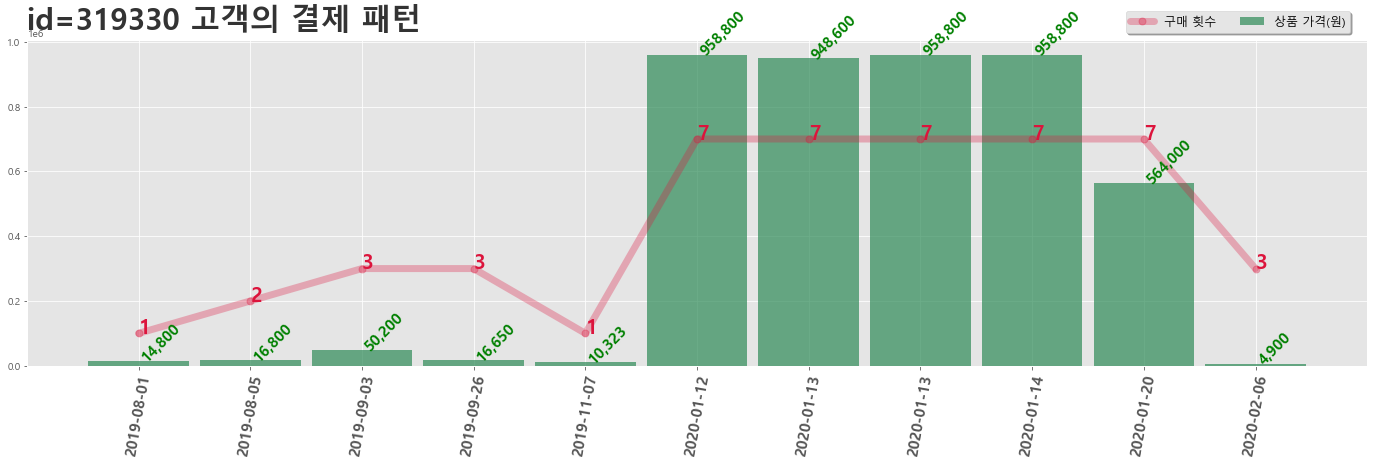

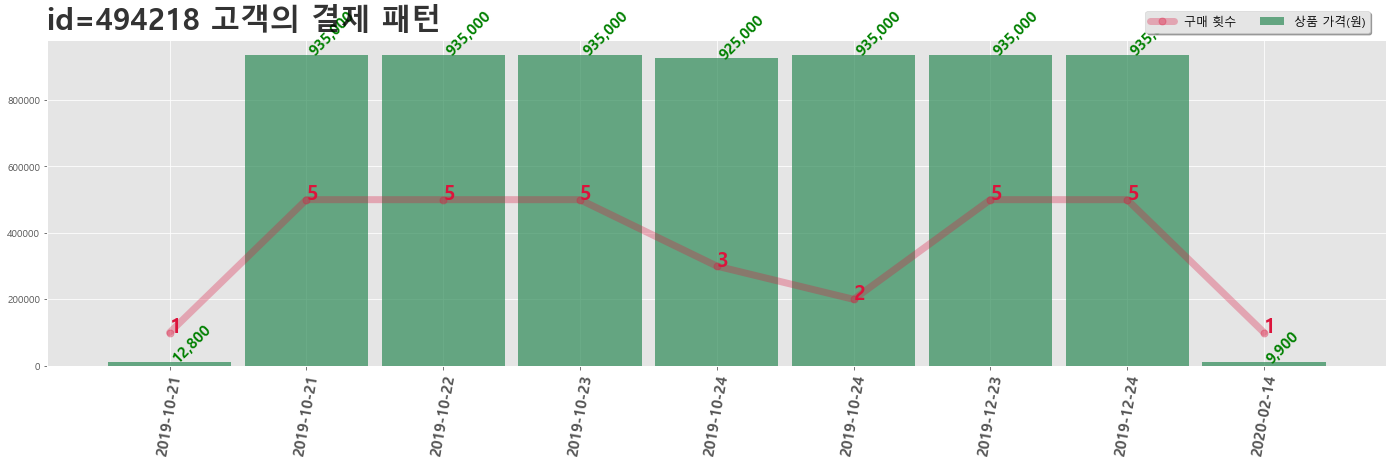

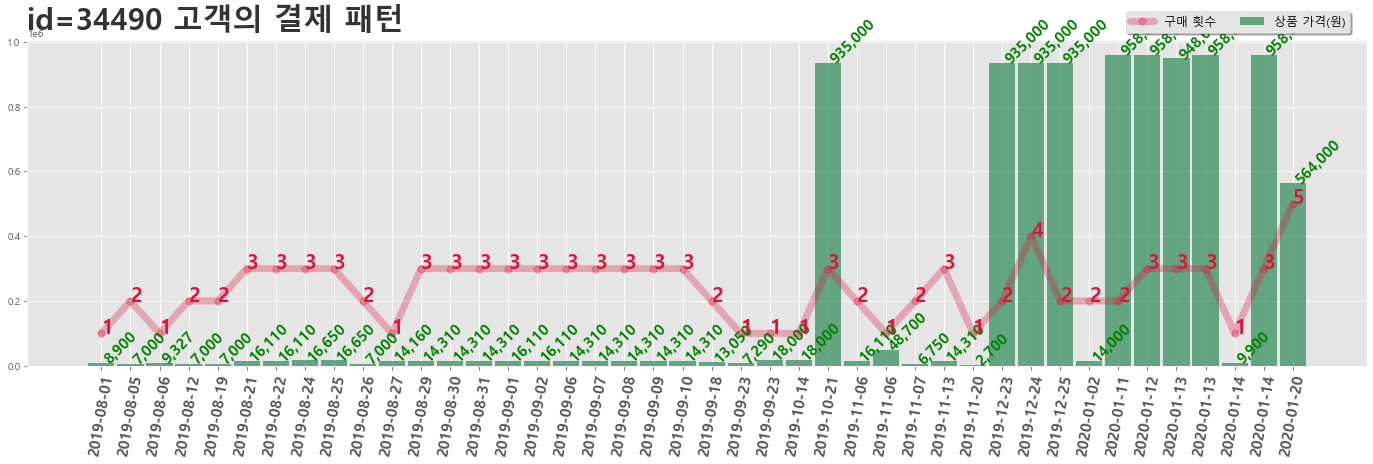

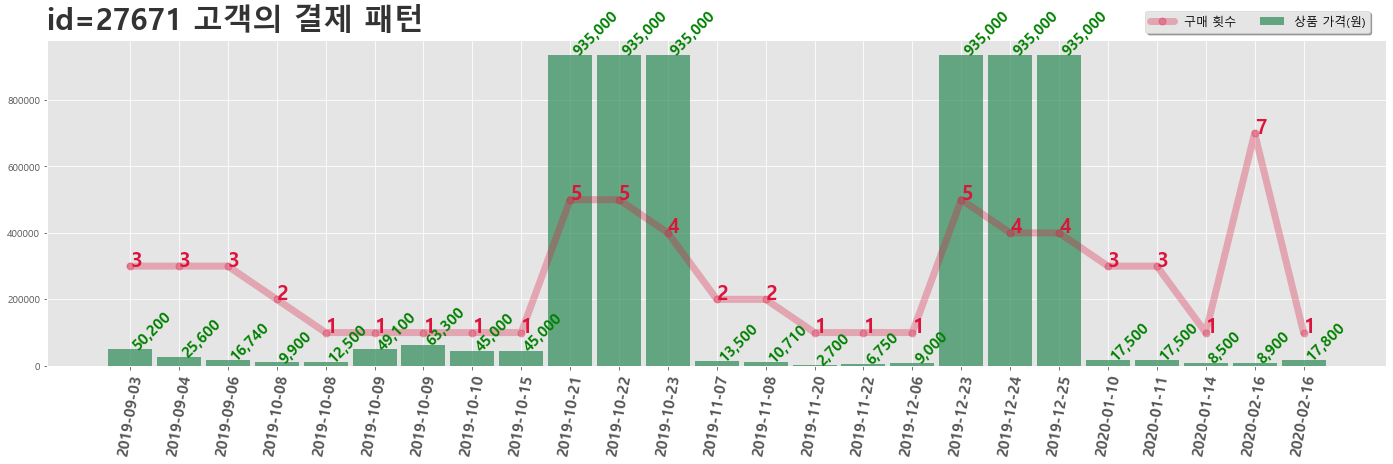

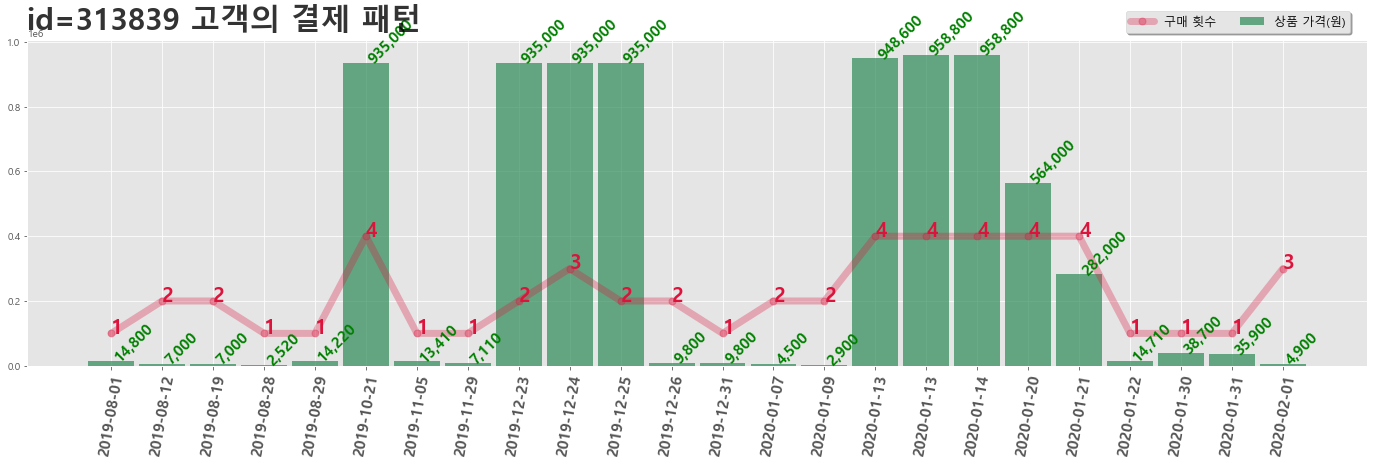

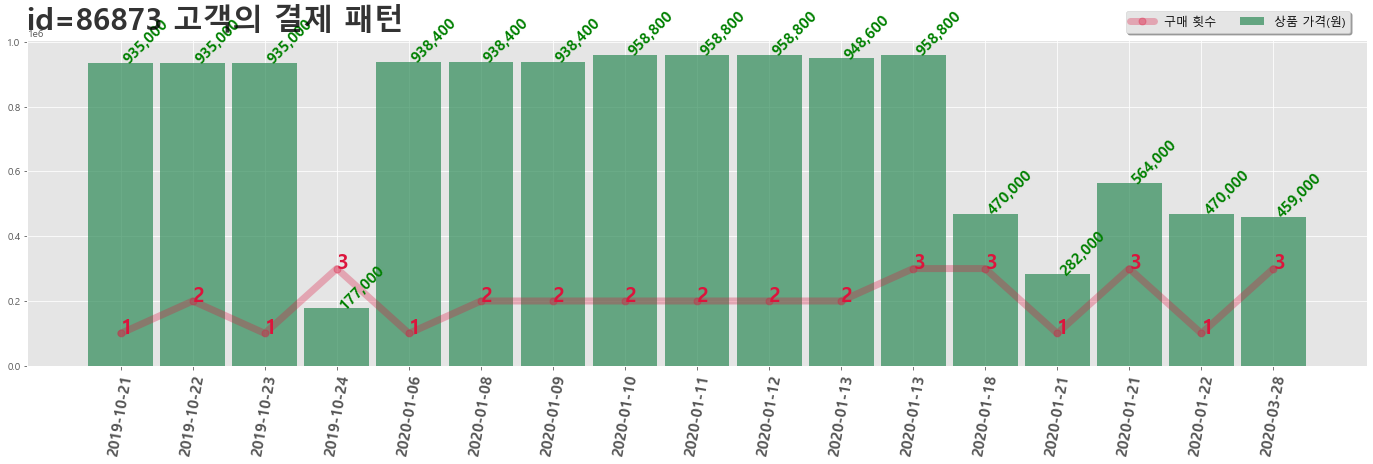

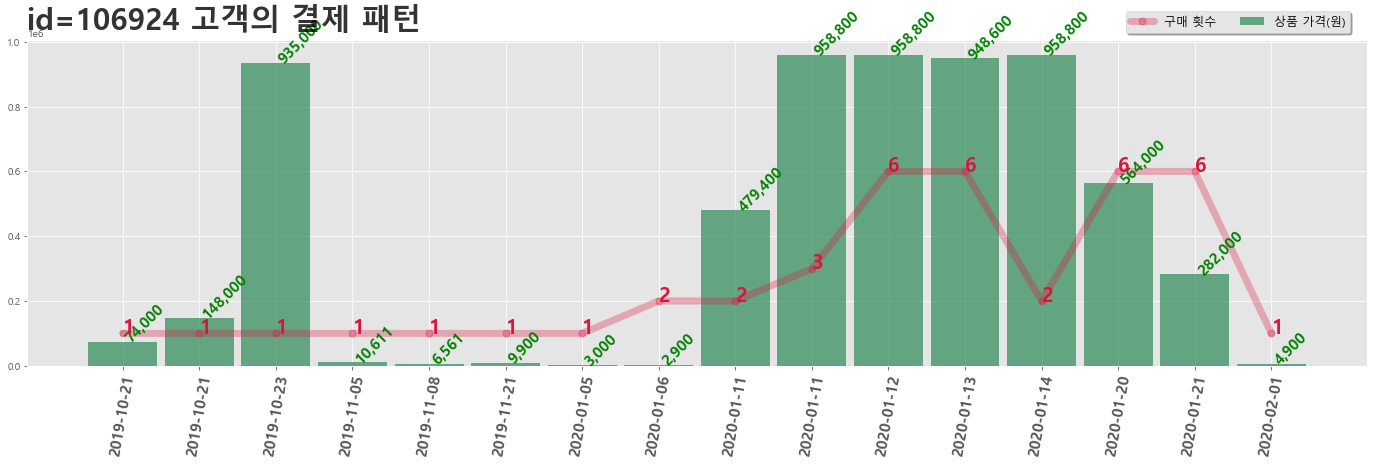

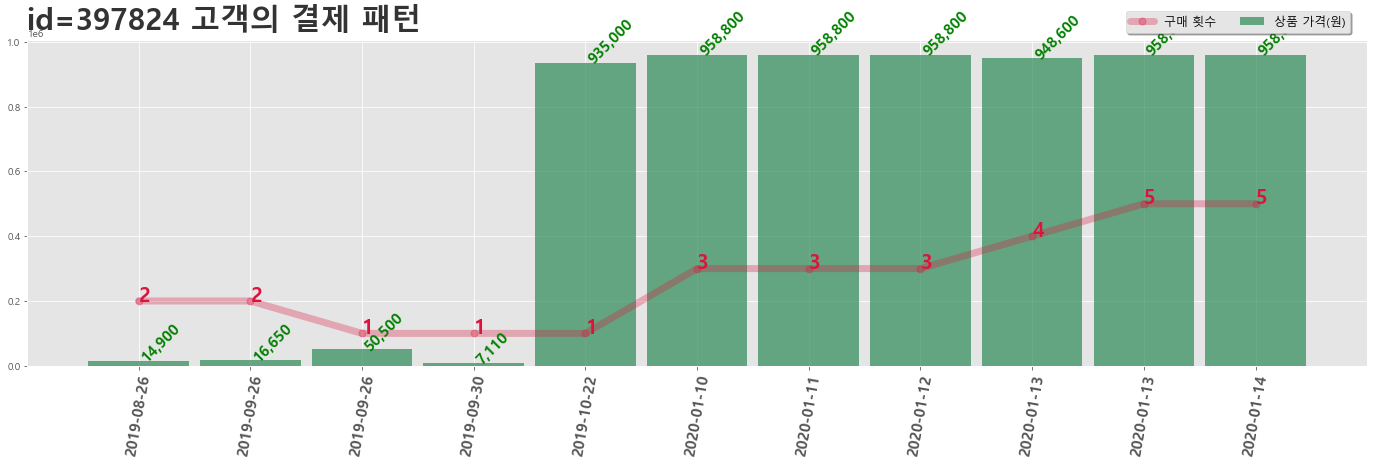

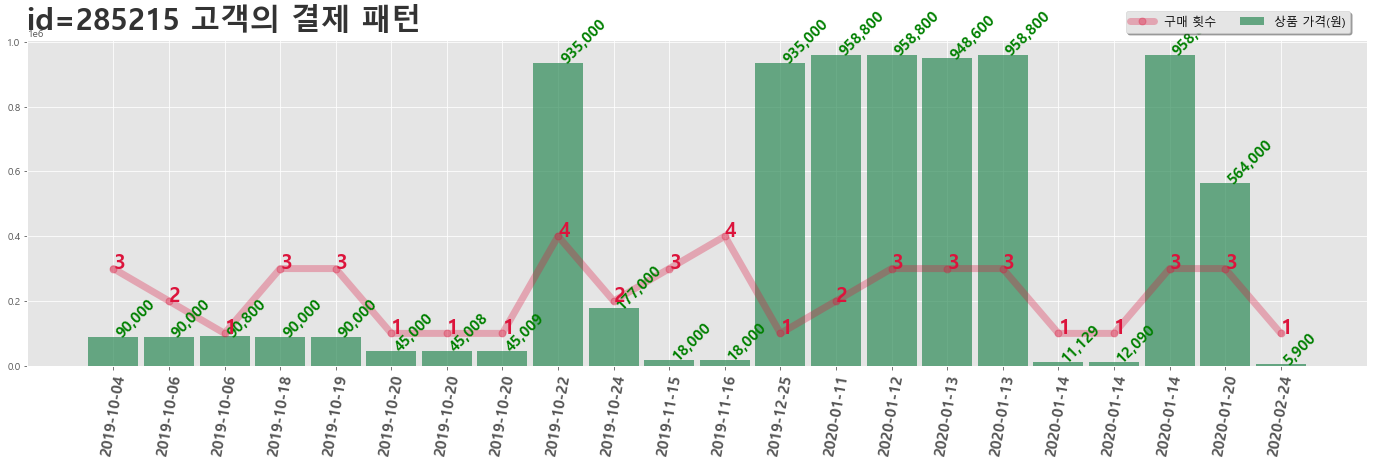

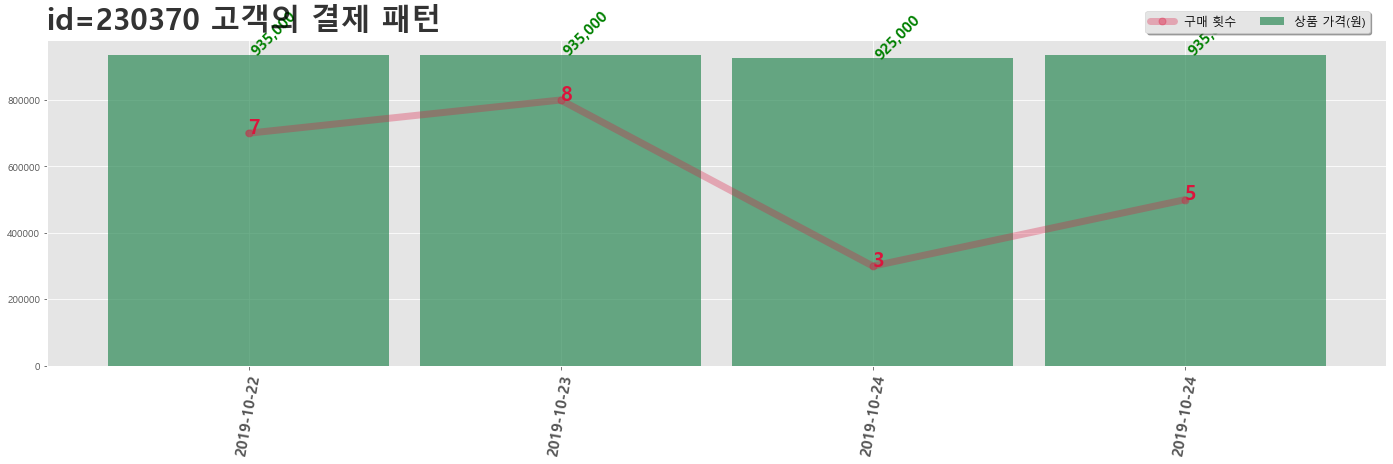

In [150]:
### 한꺼번에 그리기
for i in member[:20]:
    id = i
    df_graph = df.loc[ df.id==id ].reset_index(drop=True)
    N = len(df_graph)

    x = range(N)
    y = df_graph.pre
    c = df_graph.cnt_b.apply(lambda x:x*100000)
    x_name = df_graph.buy_cut.astype(str)
    y_name = df_graph.pre.apply(lambda x:f"{x:,}")
    c_name = df_graph.cnt_b

    plt.figure(figsize=((24,6)))
    plt.bar(x, y, color="SeaGreen", alpha=0.7, width=0.9, label="상품 가격(원)", )
    plt.plot(x, c, color="Crimson", label="구매 횟수", alpha=0.3, ls="-", linewidth=7, marker='o', ms=7, mfc="Crimson", solid_capstyle='round', )

    for i in range(N):
        plt.text(x[i],y[i],y_name[i], size=15, color="Green", weight=1000, rotation=45)
        plt.text(x[i],c[i],c_name[i], size=20, color="Crimson", weight=1000,  )
        
    plt.title(f"id={id} 고객의 결제 패턴", weight=1000, color="k", size=30, alpha=0.8, pad=10, loc="left", )
    plt.xticks(x, x_name, fontsize=15, rotation=80, weight=1000, )
    plt.legend(loc=(0.82,1.02), fontsize=12, ncol=2, frameon=True, shadow=True, )
    plt.show()

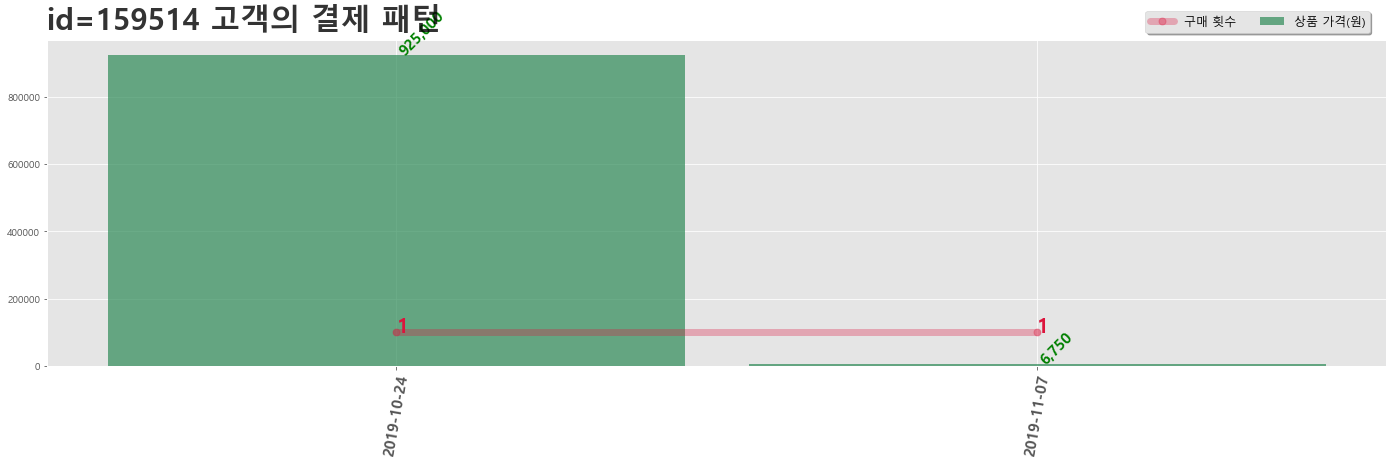

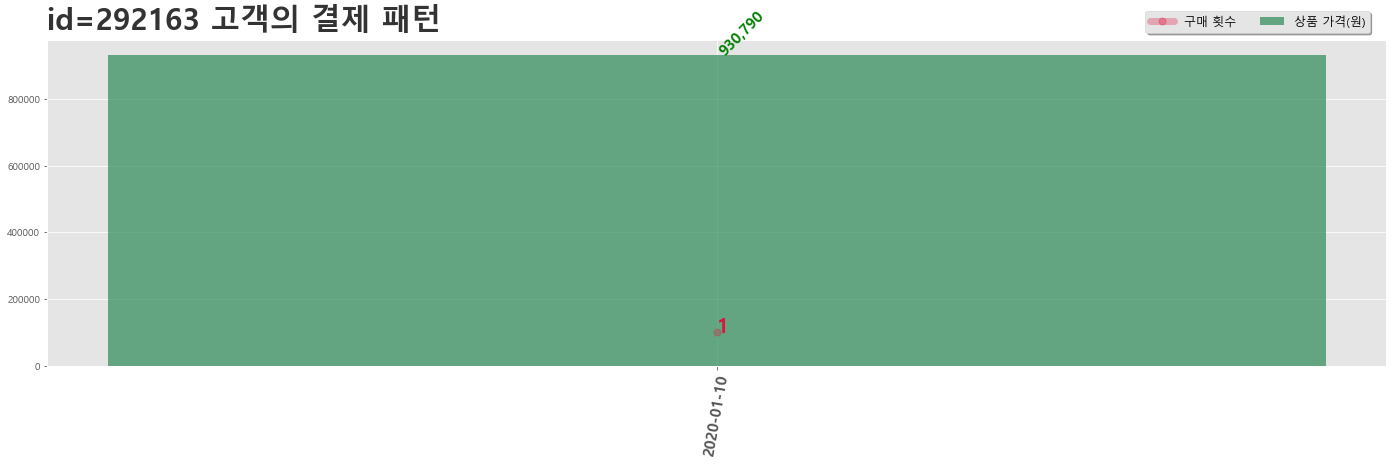

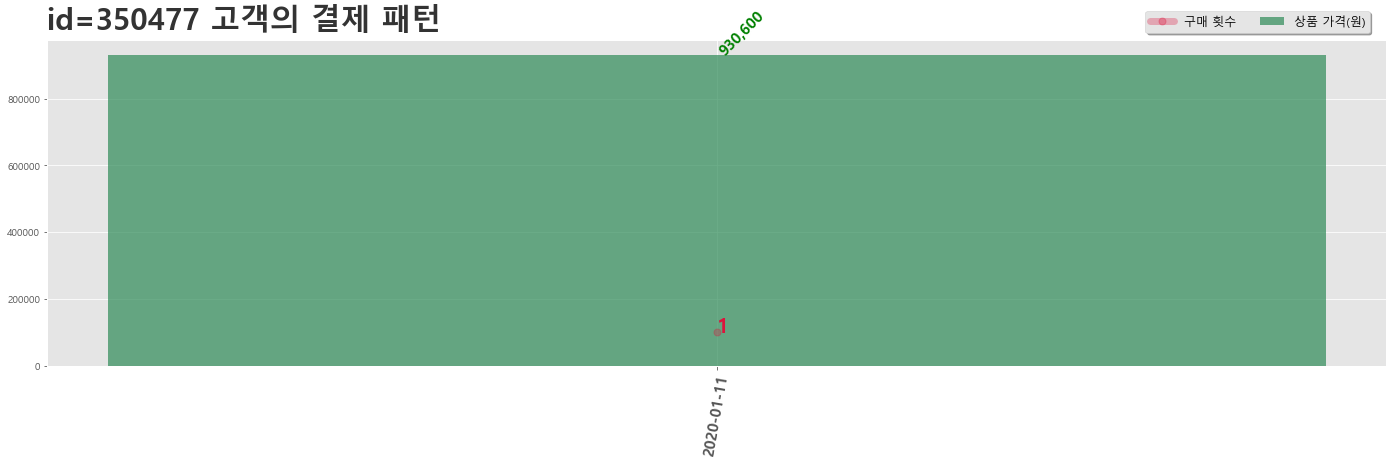

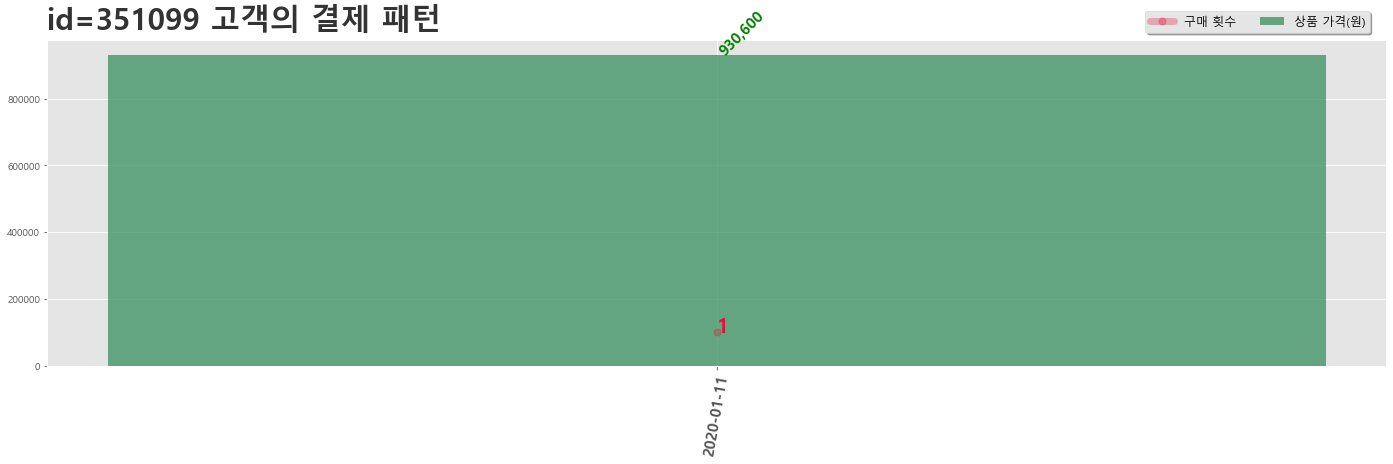

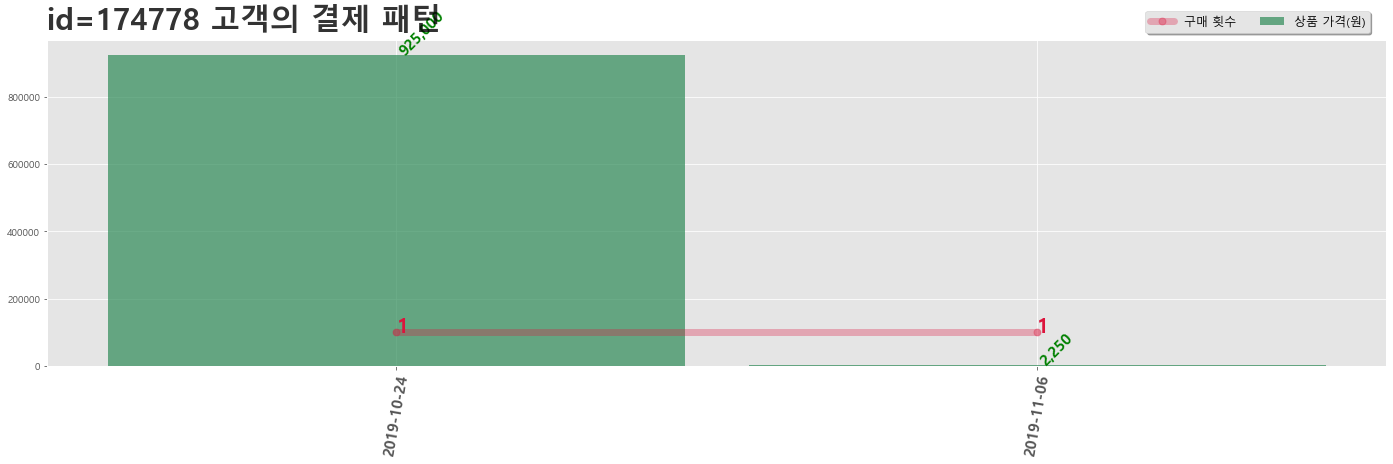

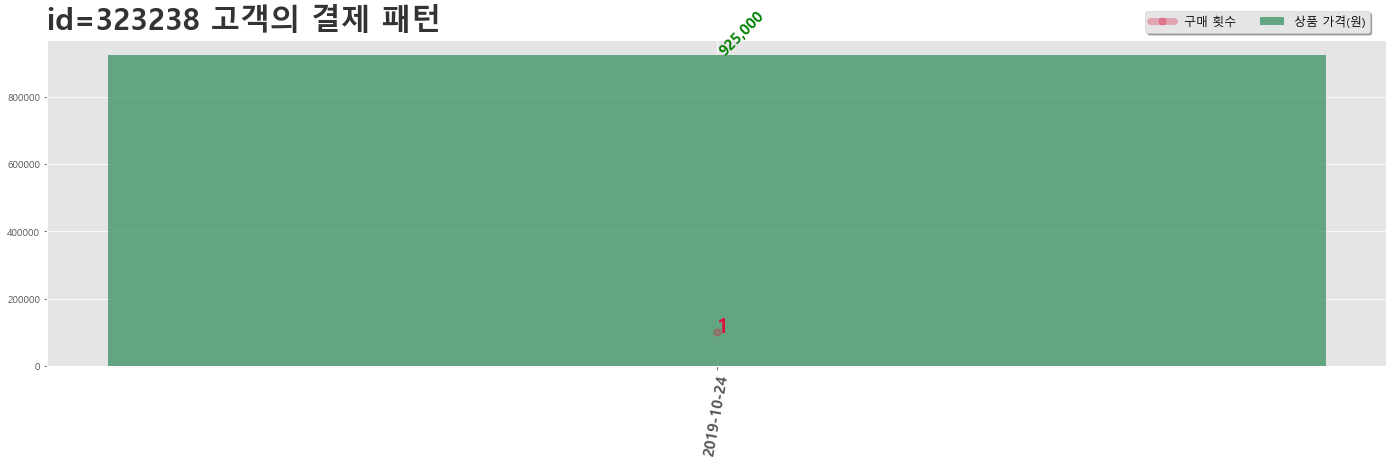

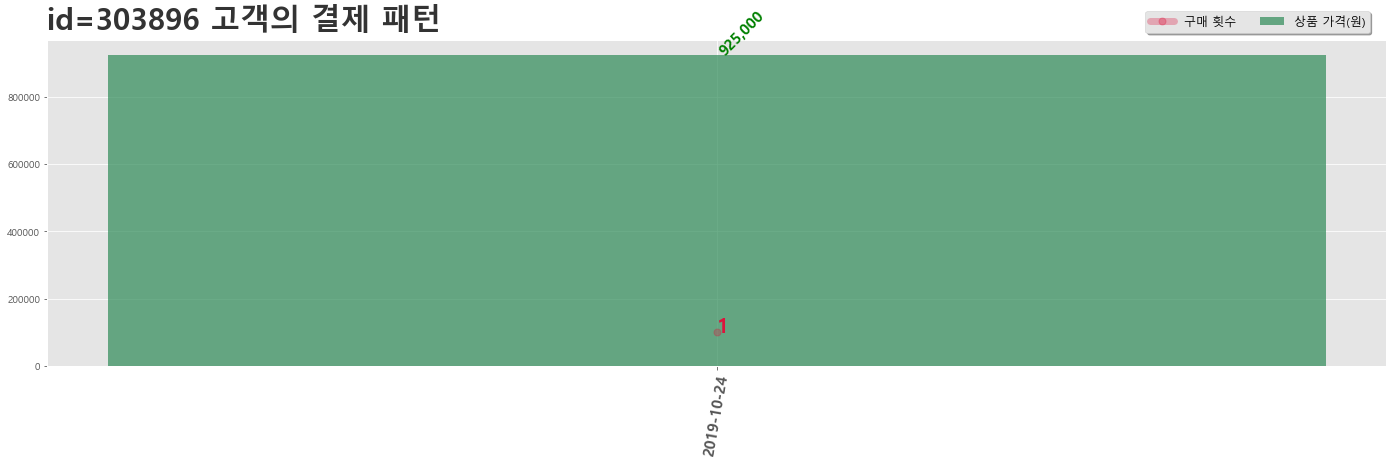

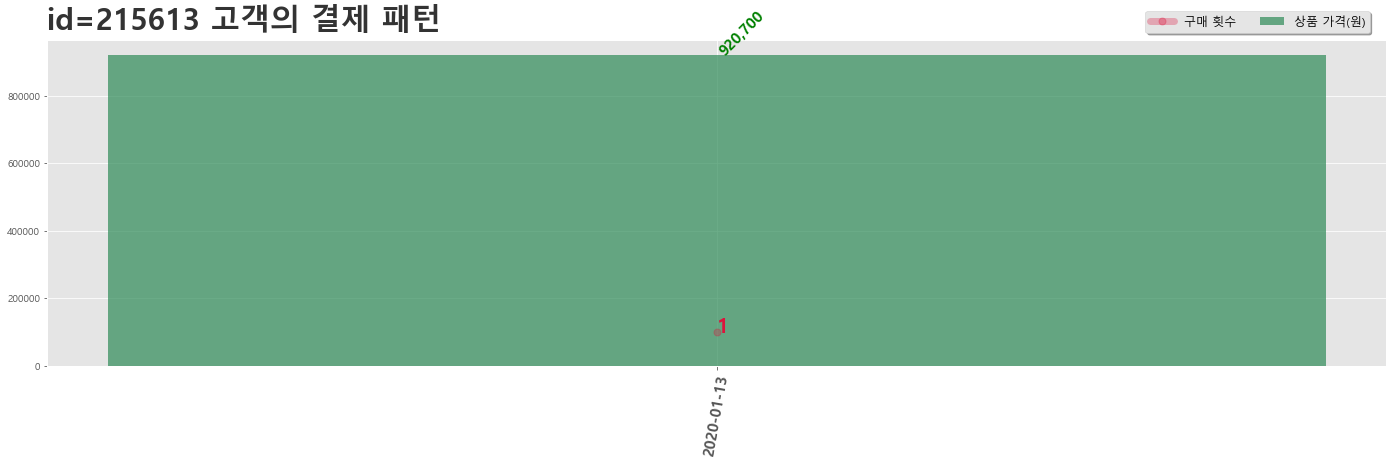

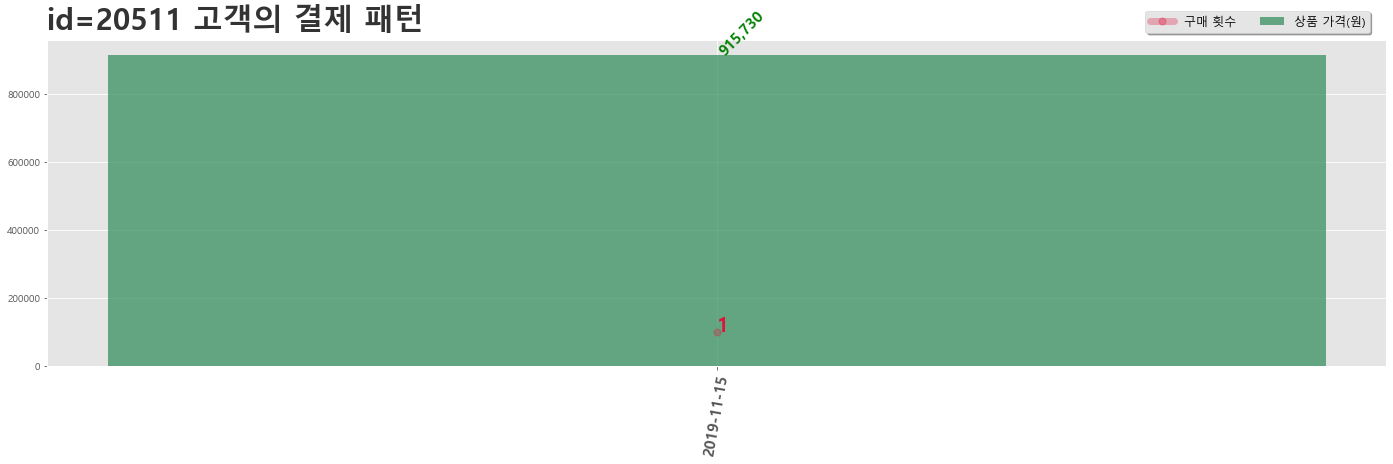

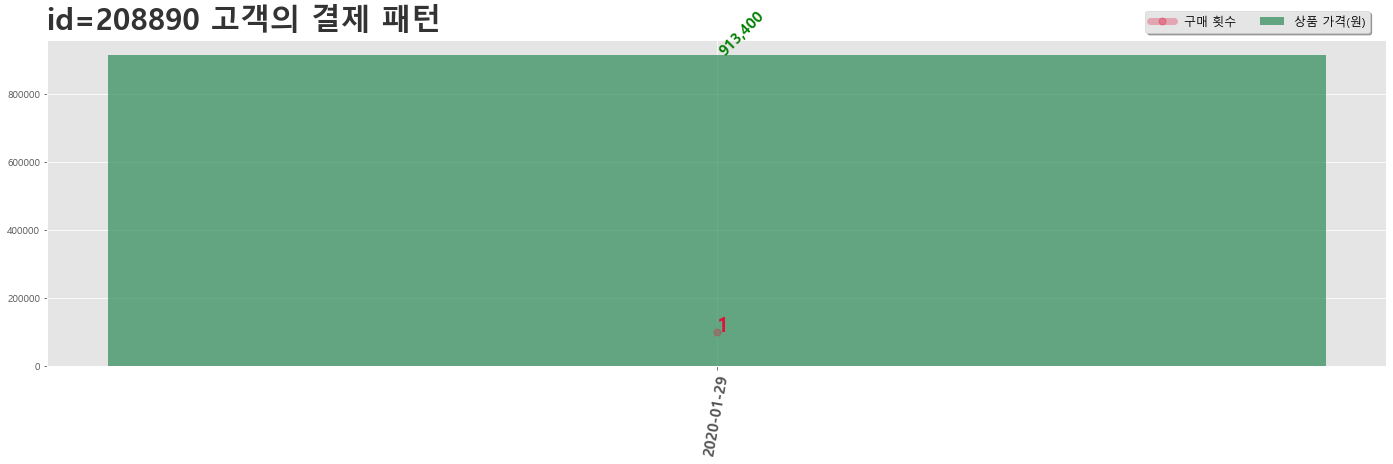

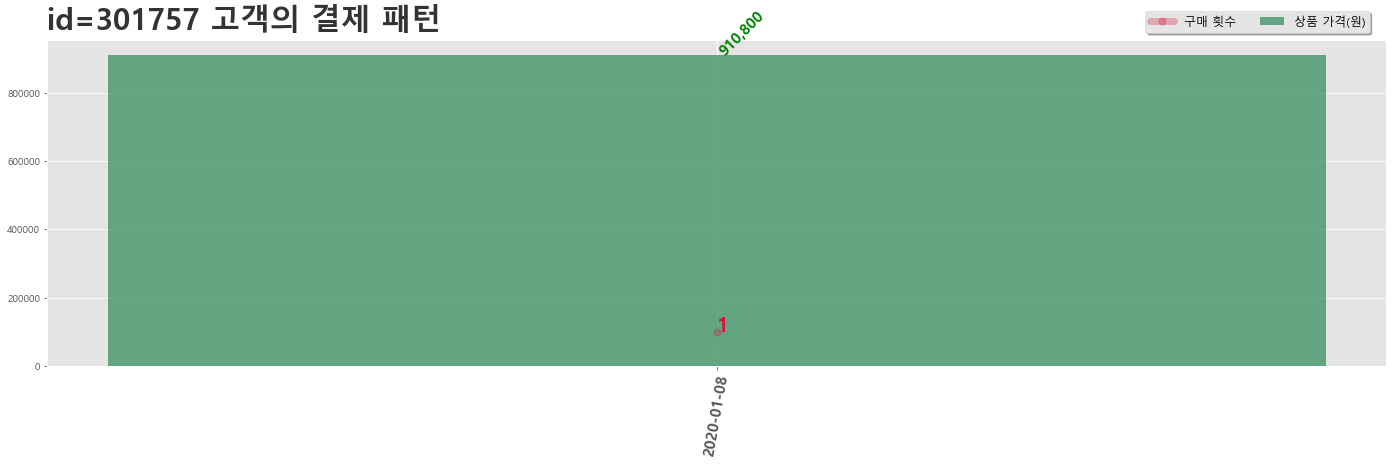

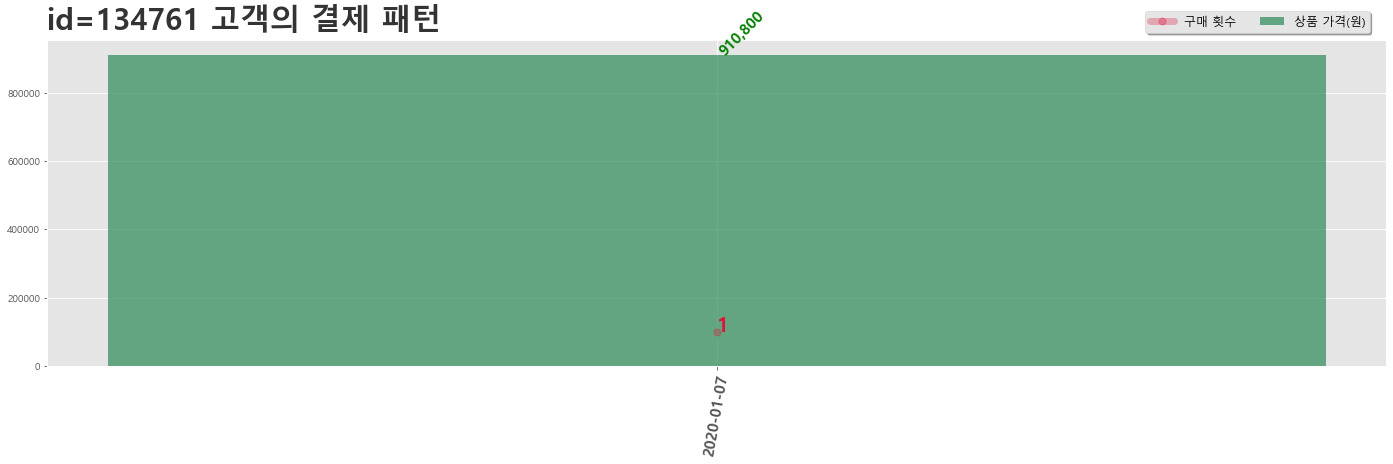

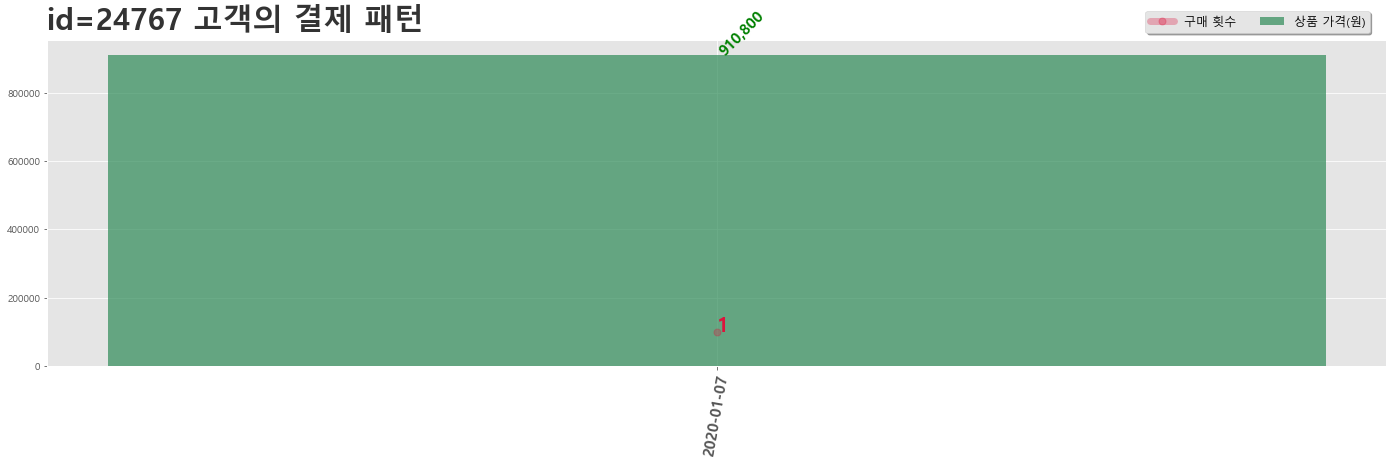

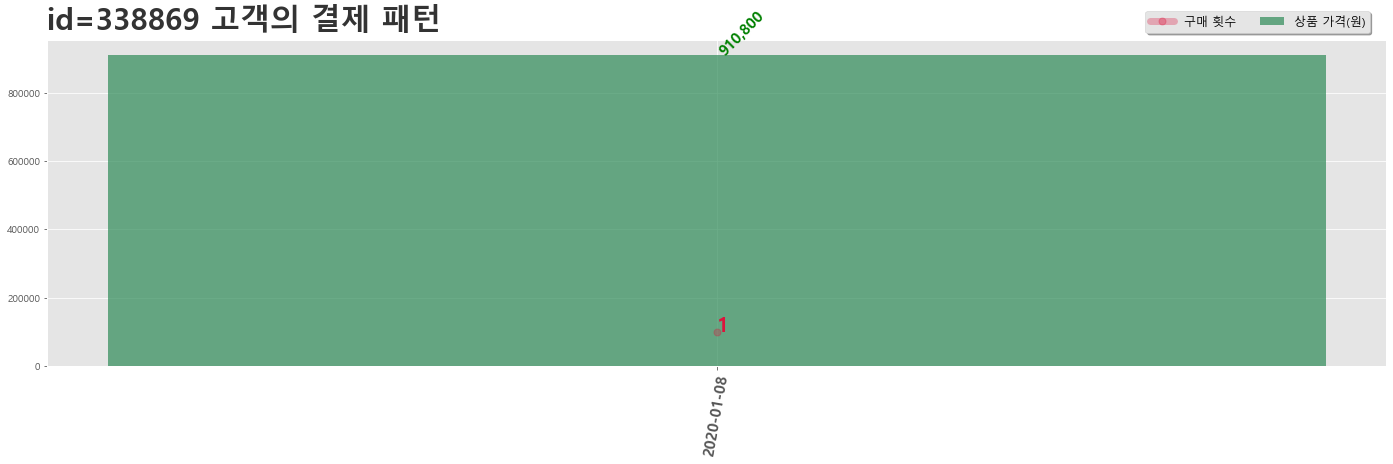

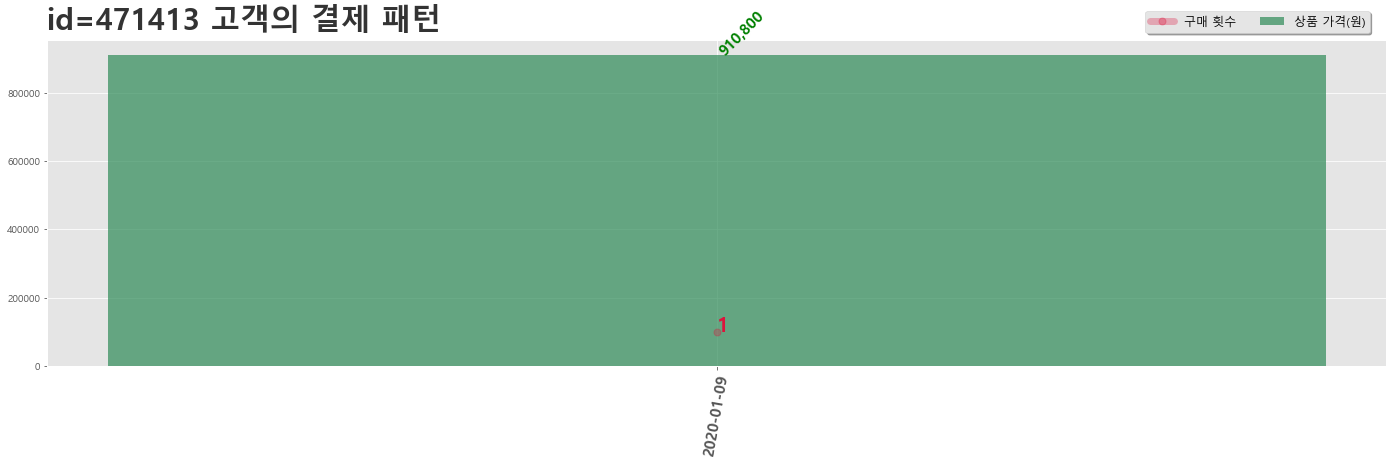

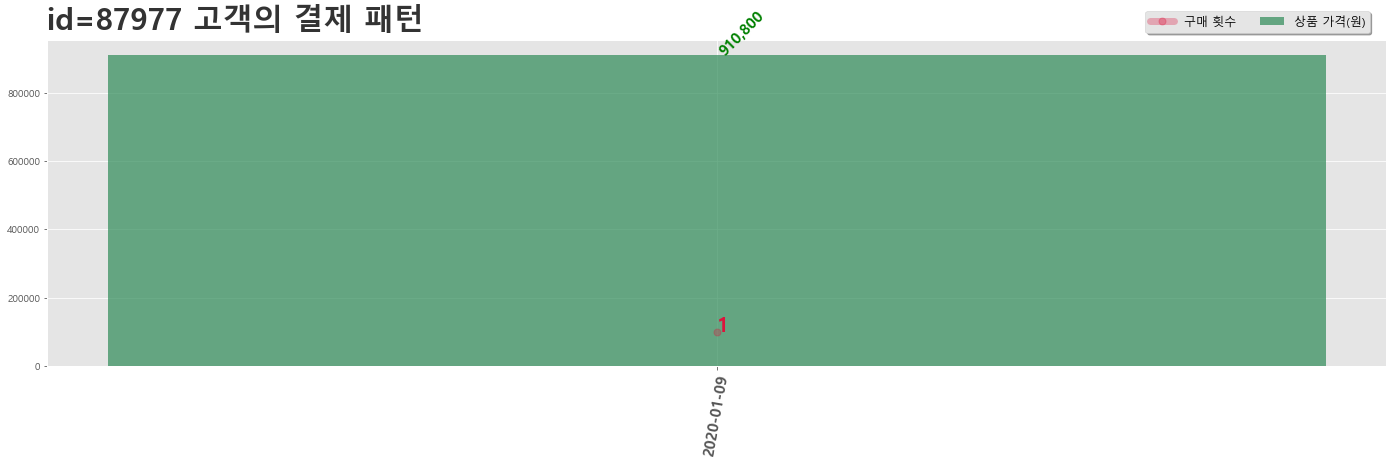

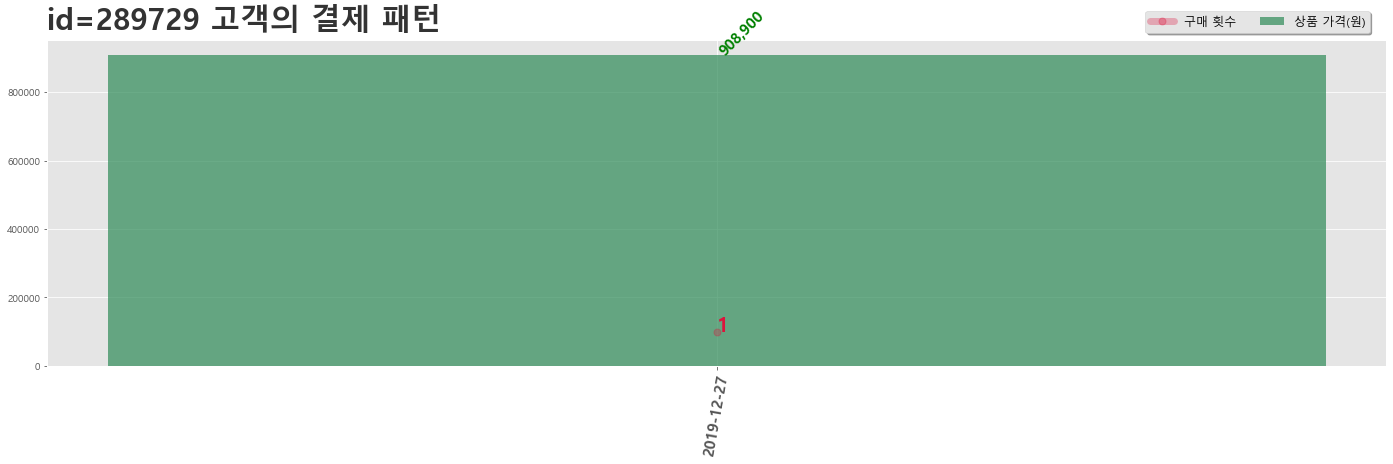

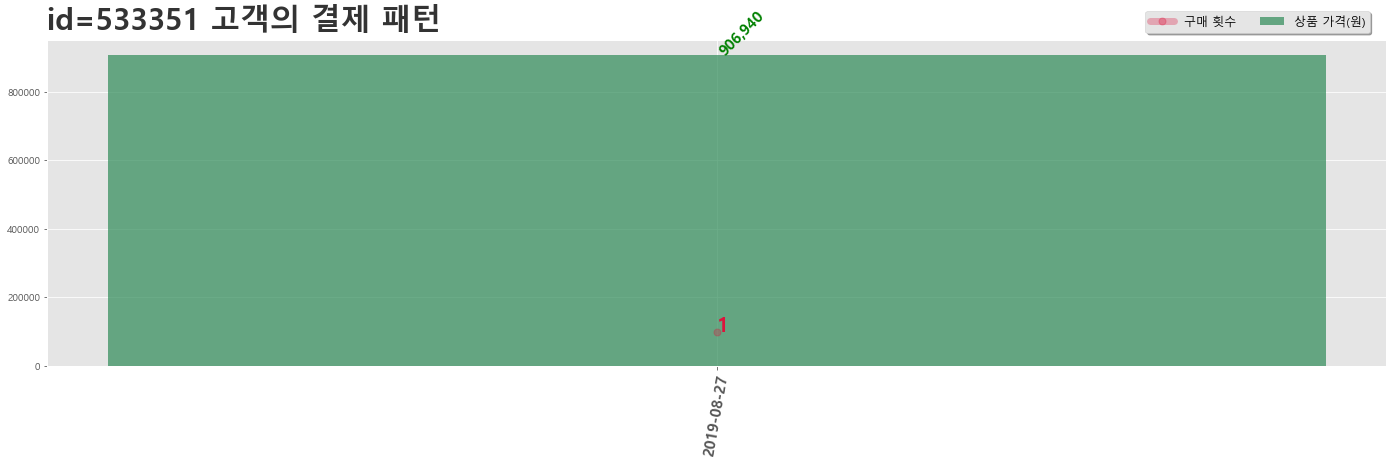

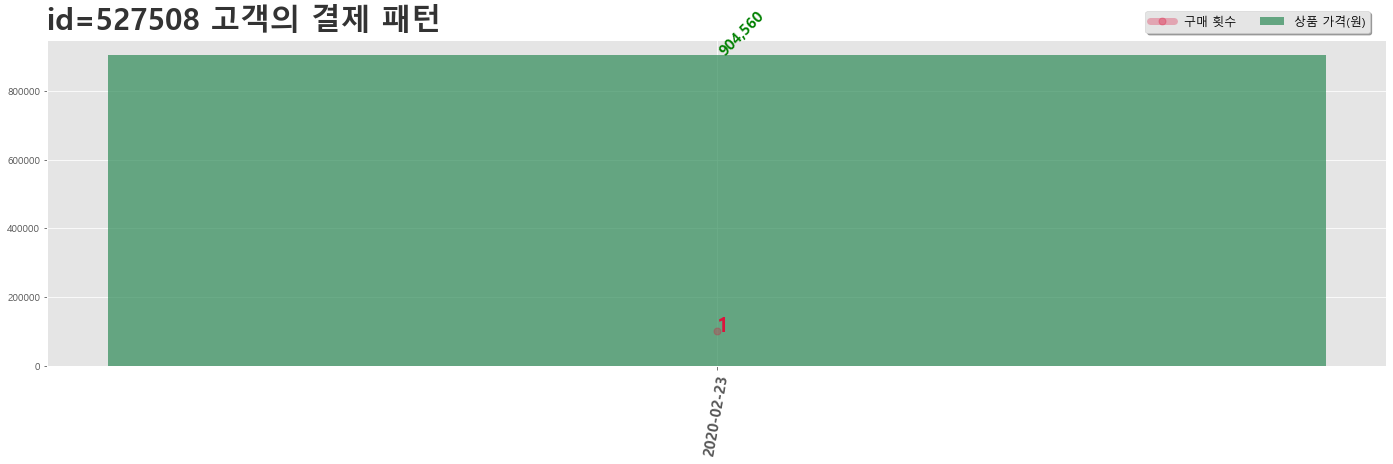

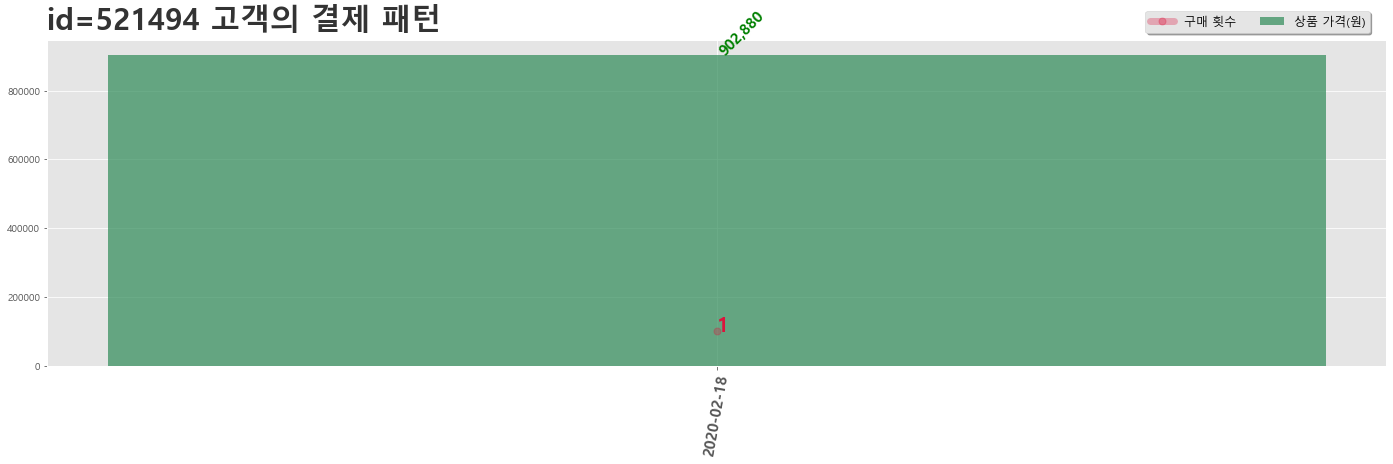

In [151]:
### 한꺼번에 그리기
for i in member[-20:]:
    id = i
    df_graph = df.loc[ df.id==id ].reset_index(drop=True)
    N = len(df_graph)

    x = range(N)
    y = df_graph.pre
    c = df_graph.cnt_b.apply(lambda x:x*100000)
    x_name = df_graph.buy_cut.astype(str)
    y_name = df_graph.pre.apply(lambda x:f"{x:,}")
    c_name = df_graph.cnt_b

    plt.figure(figsize=((24,6)))
    plt.bar(x, y, color="SeaGreen", alpha=0.7, width=0.9, label="상품 가격(원)", )
    plt.plot(x, c, color="Crimson", label="구매 횟수", alpha=0.3, ls="-", linewidth=7, marker='o', ms=7, mfc="Crimson", solid_capstyle='round', )

    for i in range(N):
        plt.text(x[i],y[i],y_name[i], size=15, color="Green", weight=1000, rotation=45)
        plt.text(x[i],c[i],c_name[i], size=20, color="Crimson", weight=1000,  )
        
    plt.title(f"id={id} 고객의 결제 패턴", weight=1000, color="k", size=30, alpha=0.8, pad=10, loc="left", )
    plt.xticks(x, x_name, fontsize=15, rotation=80, weight=1000, )
    plt.legend(loc=(0.82,1.02), fontsize=12, ncol=2, frameon=True, shadow=True, )
    plt.show()

In [153]:
df3.loc[ df3.id.apply(lambda x:x in member[-50:]) ] 

,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
77,78,45,1,0,0,1976-04-02,2019-07-21 22:33:03.233,2019-07-21,2019,7,21,935000,915000,0,20000,20000,0.0,2.1,2.1,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20510,20511,29,0,0,0,1992-01-29,2019-11-15 10:45:24.377,2019-11-15,2019,11,15,915730,907730,0,8000,8000,0.0,0.9,0.9,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
24766,24767,59,0,1,0,1962-04-29,2020-01-07 10:56:22.548,2020-01-07,2020,1,7,910800,910800,0,0,0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
87976,87977,59,0,1,0,1962-03-19,2020-01-09 12:40:28.950,2020-01-09,2020,1,9,910800,910800,0,0,0,0.0,0.0,0.0,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
134760,134761,54,0,1,0,1967-08-17,2020-01-07 10:44:59.231,2020-01-07,2020,1,7,910800,910800,0,0,0,0.0,0.0,0.0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
159513,159514,25,1,0,0,1996-09-16,2019-10-24 07:56:20.154,2019-10-24,2019,10,24,931750,891000,0,40750,40750,0.0,4.4,4.4,1,2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
174777,174778,39,1,0,0,1982-01-21,2019-10-24 06:13:59.756,2019-10-24,2019,10,24,927250,887000,0,40250,40250,0.0,4.3,4.3,1,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
189398,189399,38,0,0,0,1983-01-19,2019-10-22 06:55:25.548,2019-10-22,2019,10,22,935000,905000,0,30000,30000,0.0,3.2,3.2,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
189785,189786,32,0,0,0,1989-09-21,2019-10-22 21:37:53.406,2019-10-22,2019,10,22,935000,905000,0,30000,30000,0.0,3.2,3.2,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
190022,190023,121,0,0,0,1900-01-01,2019-10-21 20:27:11.317,2019-10-21,2019,10,21,935000,905000,0,30000,30000,0.0,3.2,3.2,1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 3_구매건 많은 유저

In [155]:
df3.loc[ df3.cnt_b>=1000 ].sort_values(by="cnt_b", ascending=False)

,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
45418,45419,31,0,1,0,1990-01-22,2019-06-18 08:52:13.835,2019-06-18,2019,6,18,27186523,26664671,131680,521852,653532,0.5,1.9,2.4,1,2705,152.0,296.0,270.0,330.0,302.0,306.0,313.0,309.0,278.0,149.0
445690,445691,30,0,1,0,1991-06-14,2019-06-14 11:11:05.813,2019-06-14,2019,6,14,35043786,34447704,216690,596082,812772,0.6,1.7,2.3,1,2630,154.0,283.0,275.0,291.0,313.0,326.0,272.0,296.0,279.0,141.0
485909,485910,32,0,1,0,1989-12-12,2019-08-09 20:21:40.524,2019-08-09,2019,8,9,27831148,27235481,158163,595667,753830,0.6,2.1,2.7,1,1684,92.0,200.0,167.0,219.0,171.0,189.0,200.0,194.0,167.0,85.0
400417,400418,28,0,1,0,1993-09-09,2019-12-18 08:22:06.652,2019-12-18,2019,12,18,22056535,21946535,851803,110000,961803,3.9,0.5,4.4,1,1363,81.0,154.0,167.0,171.0,139.0,146.0,151.0,152.0,125.0,77.0
96305,96306,29,0,1,1,1992-12-29,2019-11-17 07:35:46.262,2019-11-17,2019,11,17,15070935,14838387,222934,232548,455482,1.5,1.5,3.0,1,1229,70.0,141.0,135.0,133.0,124.0,169.0,149.0,120.0,130.0,58.0
262048,262049,25,0,1,1,1996-08-19,2019-07-02 12:48:23.359,2019-07-02,2019,7,2,14081076,13575121,141597,505955,647552,1.0,3.6,4.6,1,1127,74.0,123.0,138.0,113.0,149.0,128.0,114.0,102.0,127.0,59.0
357524,357525,31,0,1,1,1990-09-06,2019-07-25 01:27:40.673,2019-07-25,2019,7,25,22328954,21730846,181046,598108,779154,0.8,2.7,3.5,1,1020,72.0,102.0,105.0,93.0,125.0,117.0,108.0,127.0,115.0,56.0
498861,498862,28,0,1,1,1993-09-06,2019-11-28 10:55:01.076,2019-11-28,2019,11,28,17430846,17242586,52943,188260,241203,0.3,1.1,1.4,1,1013,49.0,119.0,97.0,122.0,111.0,115.0,112.0,109.0,137.0,42.0


In [156]:
infox(df1.loc[ df1.id==45419 ])

◆◆◆ (2705, 23): Total shape ◆◆◆
---(2705, 19): Numeric Data: only Real Number ↓↓↓ ---------------------------
NO    Column  null  null(%)    dtype  n_uniq  |    Mean    Std  |max-min|  │     min      Q1  median      Q3      max  
 0        id     0      0.0    int64       1  |  45,419      0          0  │  45,419  45,419  45,419  45,419   45,419  
 1       age     0      0.0    int64       1  |      31      0          0  │      31      31      31      31       31  
 2       man     0      0.0    int64       1  |       0      0          0  │       0       0       0       0        0  
 3      push     0      0.0    int64       1  |       1      0          0  │       1       1       1       1        1  
 4      frgn     0      0.0    int64       1  |       0      0          0  │       0       0       0       0        0  
 5      m_id     0      0.0    int64      10  |   5.499  2.604          9  │       1       3       6       8       10  
 6       pre     0      0.0    int64     336  |  1

# 4_보따리상 기준

In [ ]:
### 같은날, 같은금액(10만원 이상)상품을 2건 이상 결제한 경우가 3회를 초과할 때 --> 보따리상

In [ ]:
### 보따리 상품을 먼저 찾자! 90만원대 같이 ---> 40만원 50만원 30만원 20만원들 있는것 같다.
### ---------------------------------------> 한명이 하루동안 3건 이상 구매햇는데, 그런 유저가 10명 이상인 경우?!



### 구체적인 가격대들을 찾자 ----> 한명이 하루에 같은 가격 상품을 10개이상 구매할 때, 그런 유저가 많은 순!

In [4]:
display(df1.head(1))
display(df3.head(1))

,id,age,man,push,frgn,birth,sign,buy,m_id,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,buy_cut,buy_y,buy_m,buy_d,buy_7,cnt_b
0,357745,58,1,1,0,1963-03-08,2019-08-01 00:35:35.508,2019-08-01 00:32:56.331,9,43000,35000,0,8000,8000,0.0,18.6,18.6,2019-08-01,2019,8,1,3,1


,id,age,man,push,frgn,birth,sign,sign_cut,sign_y,sign_m,sign_d,pre,post,c_back,dscnt,total,c_back_R,dscnt_R,total_R,cnt_p,cnt_b,m_1,m_2,m_3,m_4,m_5,m_6,m_7,m_8,m_9,m_10
0,1,35,0,0,0,1986-03-26,2019-08-25 18:28:34.815,2019-08-25,2019,8,25,24330,18960,0,5370,5370,0.0,22.1,22.1,1,2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
### 제일 많이 팔리는 상품가를 알아보자!

data = df1[["pre","cnt_b"]].groupby("pre").sum()
data = data.sort_values(by="cnt_b",ascending=False).reset_index()

print(data.shape)
data.head(5)

(69956, 2)


,pre,cnt_b
0,9900,161414
1,5900,90899
2,8910,88127
3,7900,81148
4,4900,71423


In [11]:
data.head(50)  ### 상위 50위까지는 금액이 다 2만원 미만

,pre,cnt_b
0,9900,161414
1,5900,90899
2,8910,88127
3,7900,81148
4,4900,71423
5,11800,64788
6,6900,61157
7,3900,59362
8,8900,57051
9,11900,56347


In [12]:
data5 = data.loc[ data.pre>50000 ]
print(data5.shape)
display(data5.head(5))

data15 = data.loc[ data.pre>150000 ]
print(data15.shape)
display(data15.head(5))

data20 = data.loc[ data.pre>200000 ]
print(data20.shape)
display(data20.head(5))

(28055, 2)


,pre,cnt_b
139,93500,6947
149,935000,6441
230,85000,3661
235,141000,3536
257,56400,3116


(9030, 2)


,pre,cnt_b
149,935000,6441
298,282000,2405
359,177000,1830
402,467500,1579
414,197400,1539


(6127, 2)


,pre,cnt_b
149,935000,6441
298,282000,2405
402,467500,1579
476,958800,1263
582,280500,1013


In [13]:
for i in range(30,200,10):
    data0 = data.loc[ data.pre>i*10000 ]
    print(f"{i}만원 이상 잘팔리는 Top5", data0.shape)
    display(data0.head(5))

### 90만원대가 대량판매 마지노선

30만원 이상 잘팔리는 Top5 (3631, 2)


,pre,cnt_b
149,935000,6441
402,467500,1579
476,958800,1263
865,564000,588
1077,374000,445


40만원 이상 잘팔리는 Top5 (2389, 2)


,pre,cnt_b
149,935000,6441
402,467500,1579
476,958800,1263
865,564000,588
1717,841500,269


50만원 이상 잘팔리는 Top5 (1643, 2)


,pre,cnt_b
149,935000,6441
476,958800,1263
865,564000,588
1717,841500,269
1923,938400,241


60만원 이상 잘팔리는 Top5 (1235, 2)


,pre,cnt_b
149,935000,6441
476,958800,1263
1717,841500,269
1923,938400,241
2756,654500,168


70만원 이상 잘팔리는 Top5 (979, 2)


,pre,cnt_b
149,935000,6441
476,958800,1263
1717,841500,269
1923,938400,241
2797,948600,166


80만원 이상 잘팔리는 Top5 (783, 2)


,pre,cnt_b
149,935000,6441
476,958800,1263
1717,841500,269
1923,938400,241
2797,948600,166


90만원 이상 잘팔리는 Top5 (651, 2)


,pre,cnt_b
149,935000,6441
476,958800,1263
1923,938400,241
2797,948600,166
3652,925000,124


100만원 이상 잘팔리는 Top5 (516, 2)


,pre,cnt_b
21274,1188000,8
24316,1106500,6
26857,1166680,5
26944,1007500,5
29140,1586000,4


110만원 이상 잘팔리는 Top5 (415, 2)


,pre,cnt_b
21274,1188000,8
24316,1106500,6
26857,1166680,5
29140,1586000,4
31402,1186000,4


120만원 이상 잘팔리는 Top5 (296, 2)


,pre,cnt_b
29140,1586000,4
35706,1337000,3
36139,1390000,3
37095,1780000,3
41408,1488000,2


130만원 이상 잘팔리는 Top5 (235, 2)


,pre,cnt_b
29140,1586000,4
35706,1337000,3
36139,1390000,3
37095,1780000,3
41408,1488000,2


140만원 이상 잘팔리는 Top5 (177, 2)


,pre,cnt_b
29140,1586000,4
37095,1780000,3
41408,1488000,2
41627,1524000,2
42217,1479000,2


150만원 이상 잘팔리는 Top5 (131, 2)


,pre,cnt_b
29140,1586000,4
37095,1780000,3
41627,1524000,2
42638,1598230,2
42688,1588000,2


160만원 이상 잘팔리는 Top5 (76, 2)


,pre,cnt_b
37095,1780000,3
42876,1788000,2
42884,1782000,2
42917,1974000,2
42929,1915000,2


170만원 이상 잘팔리는 Top5 (47, 2)


,pre,cnt_b
37095,1780000,3
42876,1788000,2
42884,1782000,2
42917,1974000,2
42929,1915000,2


180만원 이상 잘팔리는 Top5 (26, 2)


,pre,cnt_b
42917,1974000,2
42929,1915000,2
42943,1880970,2
42947,1847000,2
47150,1819880,1


190만원 이상 잘팔리는 Top5 (13, 2)


,pre,cnt_b
42917,1974000,2
42929,1915000,2
47182,1914710,1
47183,1990950,1
47184,1986000,1


27


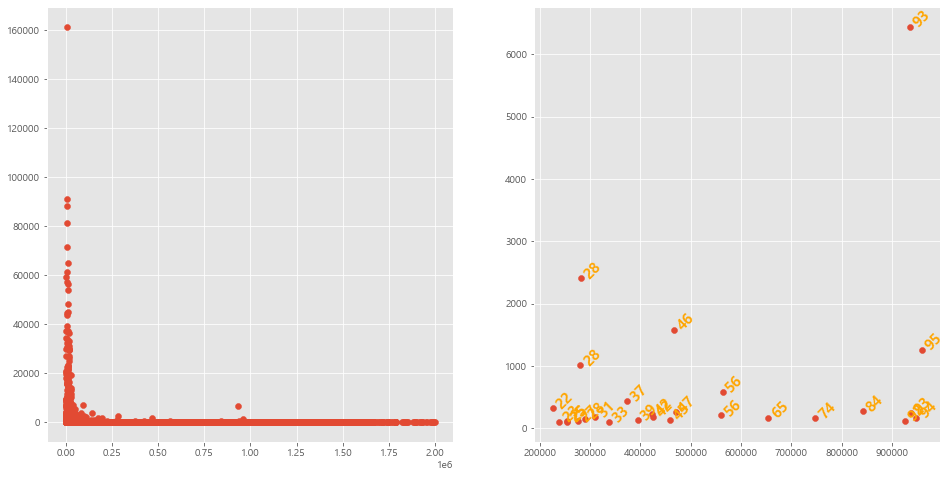

In [14]:
### 차트1) 전체 data
x1, y1 = data.pre, data.cnt_b

### 차트2) 25만원 이상 상품, 판매량 100건 이상
data_focus = data.loc[ (data.pre>=200000) & (data.cnt_b>=100) ]
data_focus = data_focus.reset_index(drop=True)
x2, y2 = data_focus.pre, data_focus.cnt_b
x_ex = [i//10000 for i in x2]
print(len(data_focus))

### 그리기
plt.figure(figsize=((16,8)))
plt.subplot(1,2,1)
plt.scatter(x1,y1)
plt.subplot(1,2,2)
plt.scatter(x2,y2)
N = len(data_focus)
[plt.text(x2[i],y2[i],x_ex[i], size=15, color="orange", weight=1000, rotation=45) for i in range(N)]
plt.show()

In [19]:
### 20만원 이상이면서, 100건 이상 팔린 상품들
case = set(data_focus.pre)

In [27]:
case

{225600,
 239000,
 253800,
 255000,
 275400,
 280500,
 282000,
 289000,
 310200,
 338400,
 374000,
 394800,
 423000,
 425000,
 459000,
 467500,
 470000,
 561000,
 564000,
 654500,
 748000,
 841500,
 925000,
 935000,
 938400,
 948600,
 958800}